#### **Problem Statement Of Travel Data**

* To remain competitive in the travel industry, 'Trips & Travel.Com' aims to segment customers based on their travel preferences and analyze spending patterns and satisfaction levels
* **Goal**: To Enhance Customer Experience and Drive Business Growth through Personalized Travel Offerings.
* **Focus**: Personalization, Customer Satisfaction, and Business Growth.


### **Step-1 Loading the Travel Dataset**

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("travel_dataset.csv")

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### **Step -2 Exploratory Data Analysis - EDA**

In [4]:
df.shape

(4888, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### **Checking Missing Values**

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* The dataset contains a total of 4888 entries, with some missing values in several columns of the dataset, including 'Age', 'TypeofContact', 'DurationOfPitch’,'Gender','NumberOfFollowups’, 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting’, and 'MonthlyIncome’.
* It includes a mix of numerical, categorical, providing comprehensive information for analysis and modeling

### **Replacing  Fe male   with Female**

In [7]:
# clean Gender column
df['Gender'] = df['Gender'].str.replace('Fe\sMale', 'Female', regex=True)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### **Checking all Imputation Techniques for  Imputing Missing Values**

<Axes: xlabel='Age', ylabel='Density'>

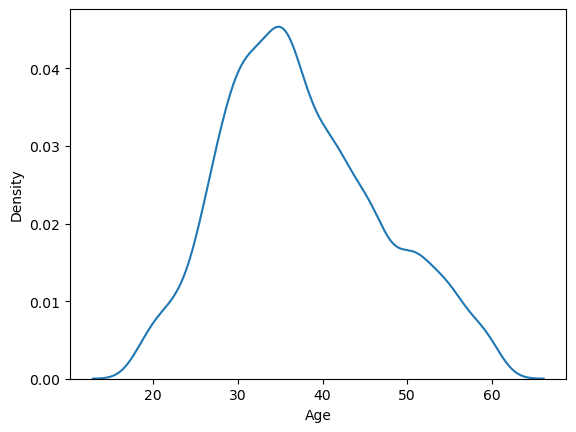

In [9]:
sns.kdeplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

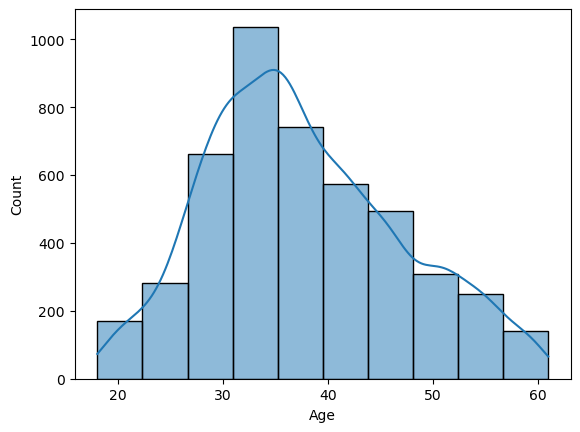

In [10]:
sns.histplot(df['Age'], bins=10, kde=True)

#  Imputing missing values with Median

In [10]:
df_Age = df['Age'].copy()
df_Age


0       41.0
1       49.0
2       37.0
3       33.0
4        NaN
        ... 
4883    49.0
4884    28.0
4885    52.0
4886    19.0
4887    36.0
Name: Age, Length: 4888, dtype: float64

In [13]:
df_Age_median = df_Age.fillna(df_Age.median())

<Axes: xlabel='Age', ylabel='Count'>

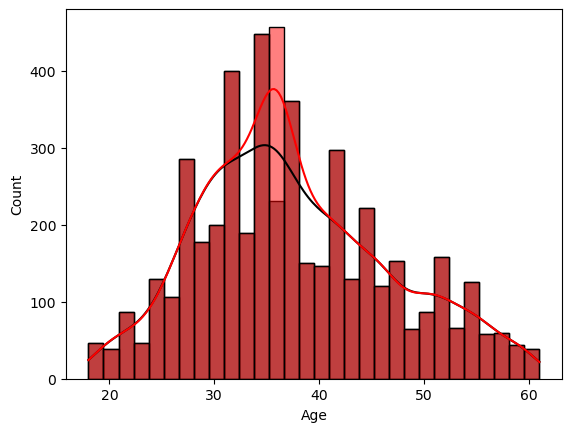

In [14]:
sns.histplot(df_Age, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_Age_median, bins=30, kde=True, color='red', label='Imputed with Median')

 # Imputing missing values with Mean

<Axes: xlabel='Age', ylabel='Count'>

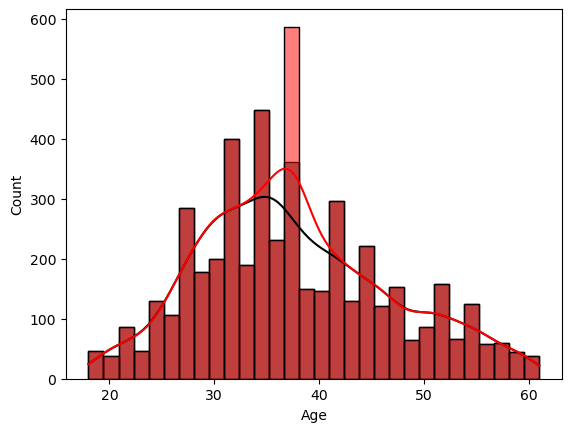

In [14]:
df_Age1 = df['Age'].copy()
df_Age_mean = df_Age.fillna(df_Age.mean())
sns.histplot(df_Age1, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_Age_mean, bins=30, kde=True, color='red', label='Imputed with Median')

 #  Imputing missing values with ffill

<Axes: xlabel='Age', ylabel='Count'>

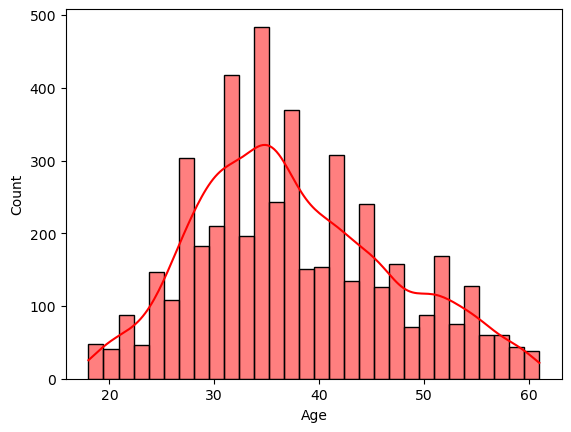

In [15]:
df_Age2 = df['Age'].copy()
df_Age_ffill = df_Age2.fillna(method='ffill', inplace=True)
sns.histplot(df_Age2, bins=30, kde=True, color='red', label='Original')
sns.histplot(df_Age_ffill, bins=30, kde=True, color='black', label='Imputed with missing technique')

# Imputing missing values with bfill

<Axes: xlabel='Age', ylabel='Count'>

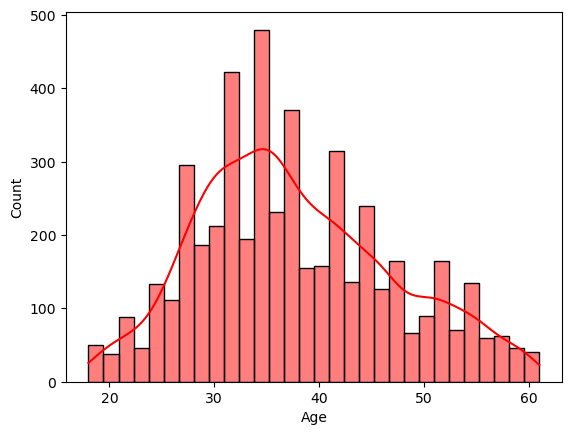

In [16]:
df_Age3 = df['Age'].copy()
df_Age_bfill = df_Age3.fillna(method='bfill', inplace=True)
sns.histplot(df_Age3, bins=30, kde=True, color='red', label='Original')
sns.histplot(df_Age_bfill, bins=30, kde=True, color='black', label='Imputed with missing technique')

# Imputing missing values with Interpolate

<Axes: xlabel='Age', ylabel='Count'>

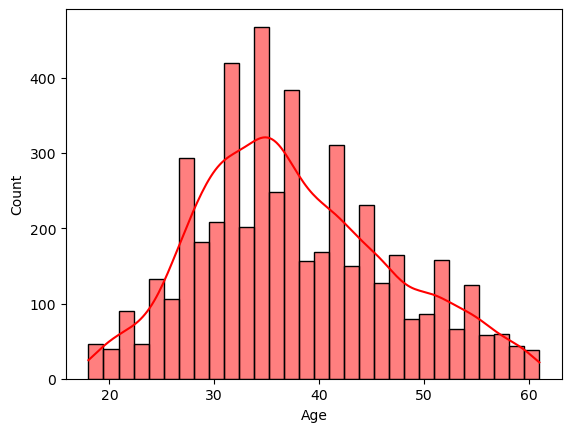

In [17]:
df_Age4 = df['Age'].copy()
df_Age_inter = df_Age4.interpolate(method='linear', inplace=True)

sns.histplot(df_Age4, bins=30, kde=True, color='red', label='Original')
sns.histplot(df_Age_inter, bins=30, kde=True, color='black', label='Imputed with missing technique')

# Imputation in Age column  with ffill

<Axes: xlabel='Age', ylabel='Count'>

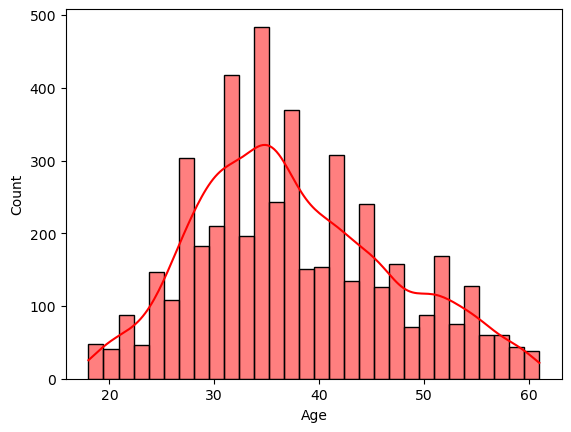

In [15]:
df_Age_ffill = df['Age'].fillna(method='ffill', inplace=True)
sns.histplot(df['Age'], bins=30, kde=True, color='red', label='Original')
sns.histplot(df_Age_ffill, bins=30, kde=True, color='black', label='Imputed with missing technique')

# 2. Imputation Techniques for  type of contact

In [19]:
df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [20]:
 mode_value=df['TypeofContact'].mode()[0]

In [21]:
 mode_value

'Self Enquiry'

In [22]:
df['TypeofContact'].fillna(mode_value, inplace=True)

# 3 . Imputing missing techniques for Durationofpitch

In [23]:
df['DurationOfPitch'].unique()

array([  6.,  14.,   8.,   9.,  30.,  29.,  33.,  22.,  21.,  32.,  25.,
        27.,  11.,  17.,  15.,  13.,  12.,  16.,  10.,  31.,  18.,  nan,
        24.,  35.,  28.,  20.,  26.,  34.,  23.,   5.,  19., 126.,   7.,
        36., 127.])

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

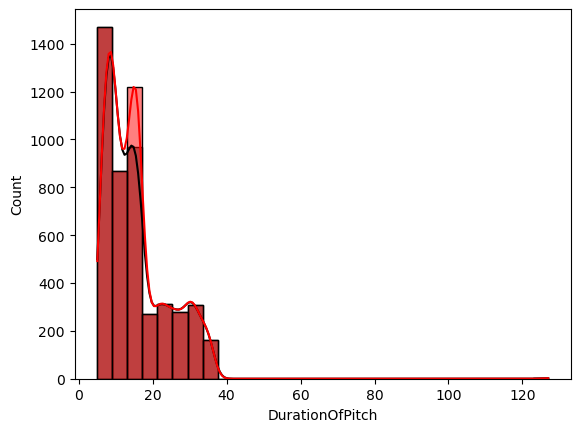

In [24]:
df_D1 = df['DurationOfPitch'].copy()
df_D_mean = df_D1.fillna(df_D1.mean())
sns.histplot(df_D1, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D_mean, bins=30, kde=True, color='red', label='Imputed with Median')

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

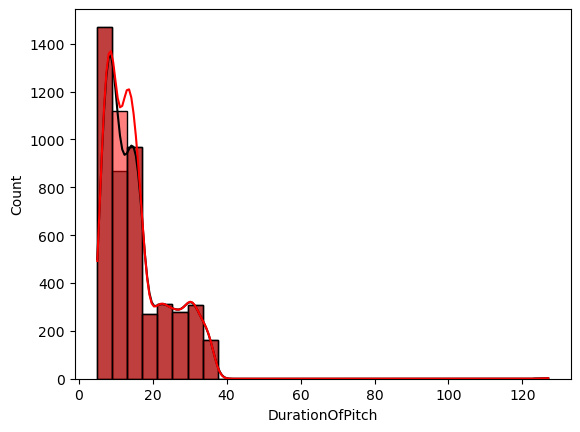

In [25]:
df_D2 = df['DurationOfPitch'].copy()
df_D2_median = df_D2.fillna(df_D2.median())
sns.histplot(df_D2, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D2_median, bins=30, kde=True, color='red', label='Imputed with Median')

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

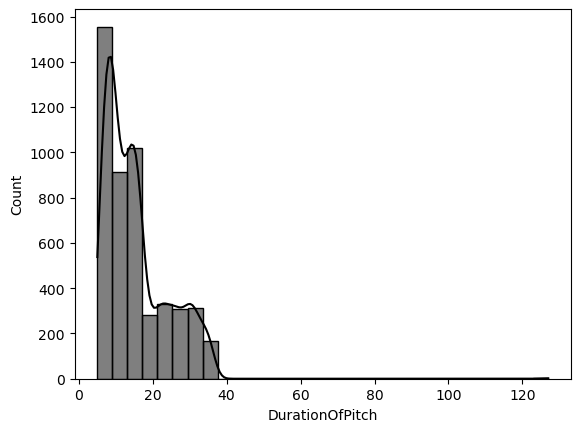

In [26]:
df_D3= df['DurationOfPitch'].copy()
df_D_ffill = df_D3.fillna(method='ffill', inplace=True)
sns.histplot(df_D3, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D_ffill, bins=30, kde=True, color='red', label='Imputed with missing technique')

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

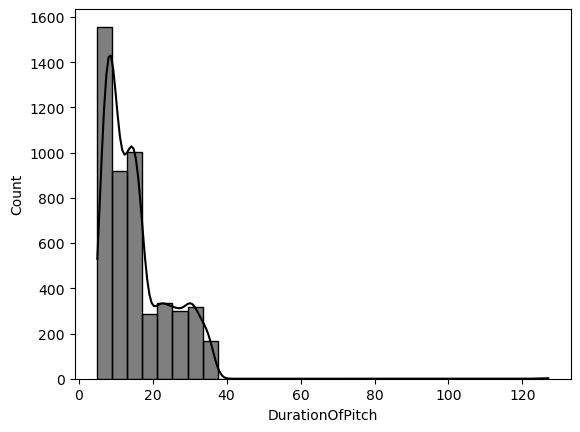

In [27]:
df_D4= df['DurationOfPitch'].copy()
df_D_bfill = df_D4.fillna(method='bfill', inplace=True)
sns.histplot(df_D4, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D_bfill, bins=30, kde=True, color='purple', label='Imputed with missing technique')

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

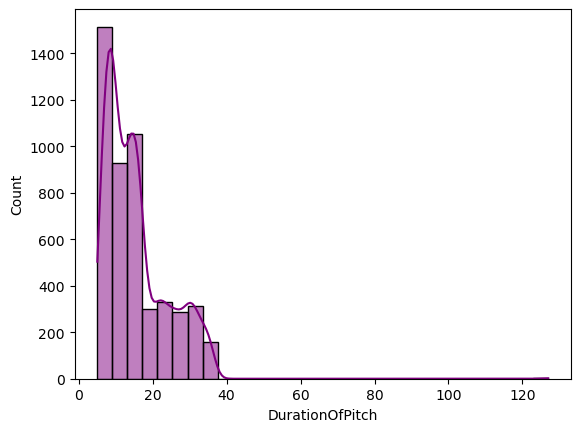

In [28]:
df_D5= df['DurationOfPitch'].copy()
df_D_inter = df_D5.interpolate(method='linear', inplace=True)
sns.histplot(df_D5, bins=30, kde=True, color='purple', label='Original')
sns.histplot(df_D_inter, bins=30, kde=True, color='black', label='Imputed with missing technique')

#  imputation  on Original durationofpitch col

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

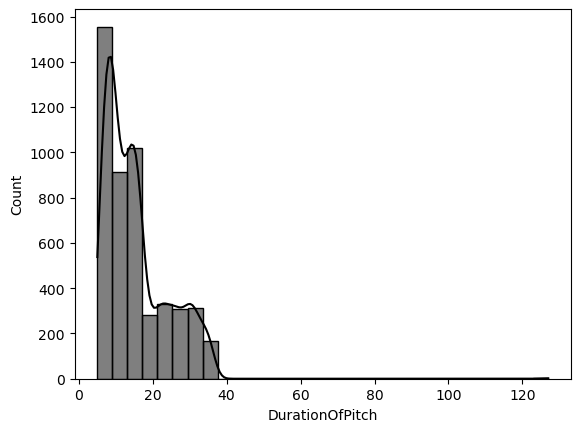

In [29]:
# original imputation
df_D_ffill = df['DurationOfPitch'].fillna(method='ffill', inplace=True)
sns.histplot(df['DurationOfPitch'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D_ffill, bins=30, kde=True, color='purple', label='Imputed with missing technique')

In [30]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# 4. Numberoffollowup imputing with mode

In [16]:
df['NumberOfFollowups'].unique()

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

In [17]:
mode_value = df['NumberOfFollowups'].mode()[0]

df['NumberOfFollowups'].fillna(mode_value, inplace=True)

In [18]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## 5.  Imputing Missing Value techniques for Number of trips

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

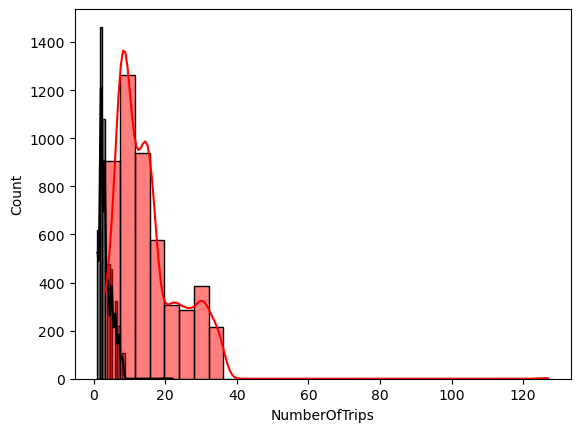

In [34]:
# Number of Trips
df_N1 = df['NumberOfTrips'].copy()
df_N_mean = df_D1.fillna(df_N1.mean())
sns.histplot(df_N1, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_N_mean, bins=30, kde=True, color='red', label='Imputed with Median')

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

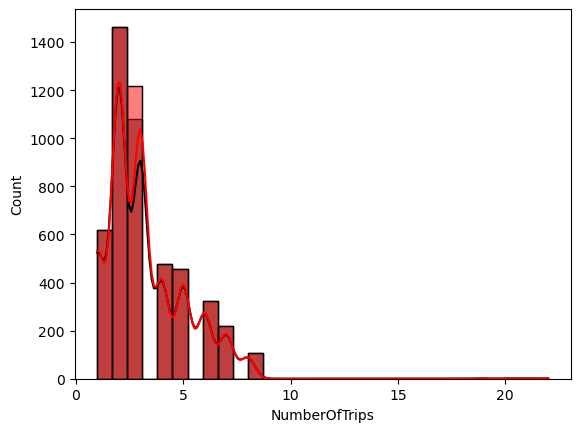

In [35]:
df_N2 = df['NumberOfTrips'].copy()
df_N2_median = df_N2.fillna(df_N2.median())
sns.histplot(df_N2, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_N2_median, bins=30, kde=True, color='red', label='Imputed with Median')

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

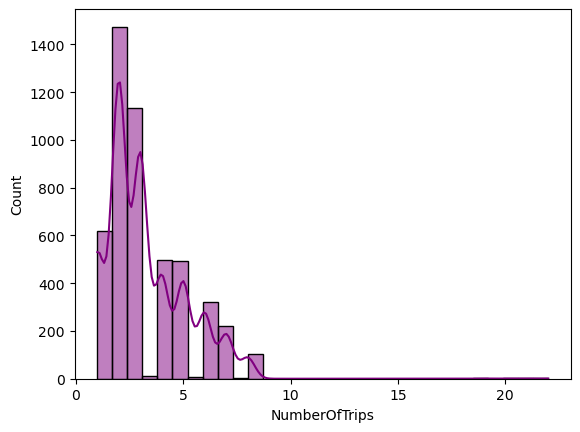

In [36]:
df_N5= df['NumberOfTrips'].copy()
df_N_inter = df_N5.interpolate(method='linear', inplace=True)

sns.histplot(df_N5, bins=30, kde=True, color='purple', label='Original')
sns.histplot(df_N_inter, bins=30, kde=True, color='black', label='Imputed with missing technique')

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

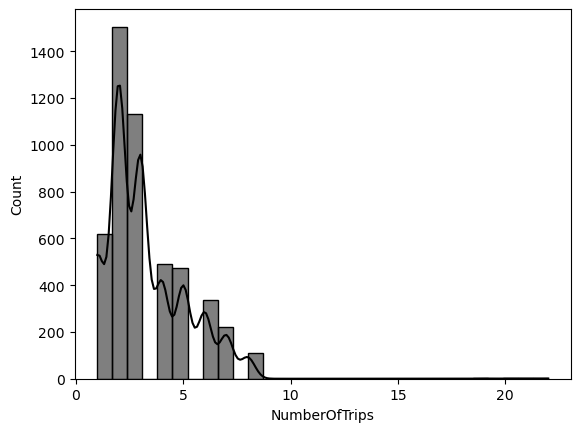

In [37]:
df_D4= df['NumberOfTrips'].copy()
df_D_bfill = df_D4.fillna(method='bfill', inplace=True)
sns.histplot(df_D4, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D_bfill, bins=30, kde=True, color='purple', label='Imputed with missing technique')

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

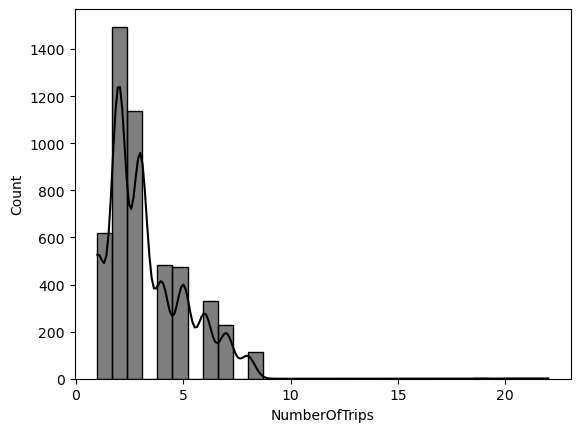

In [21]:
df_N3= df['NumberOfTrips'].copy()
df_N_bfill = df_N3.fillna(method='ffill', inplace=True)
sns.histplot(df_N3, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_N_bfill, bins=30, kde=True, color='purple', label='Imputed with missing technique')

# Imputing on original col of numberoftrips

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

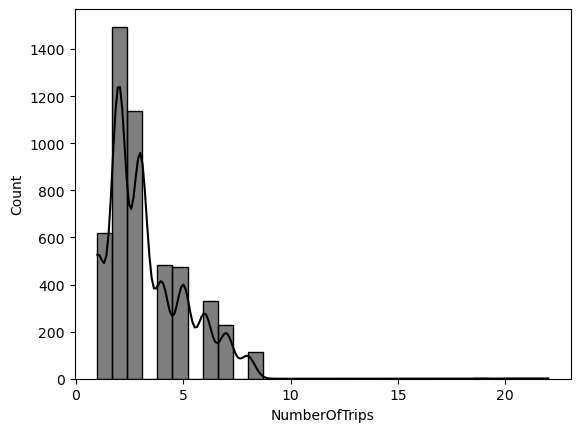

In [39]:
# Imputing on original col of numberoftrips
df_D_ffill = df['NumberOfTrips'].fillna(method='ffill', inplace=True) 
sns.histplot(df['NumberOfTrips'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df_D_ffill, bins=30, kde=True, color='purple', label='Imputed with missing technique') 

In [40]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# 6. imputing PreferredPropertyStar with mode

In [41]:
# 4. imputing PreferredPropertyStar
df['PreferredPropertyStar'].unique()

array([ 3.,  4.,  5., nan])

In [22]:
mode_value = df['PreferredPropertyStar'].mode()[0]

# Replace missing values in 'NumberOfFollowups' column with the mode
df['PreferredPropertyStar'].fillna(mode_value, inplace=True)

In [43]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# Imputing on original data Missing values in Monthlyincome

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

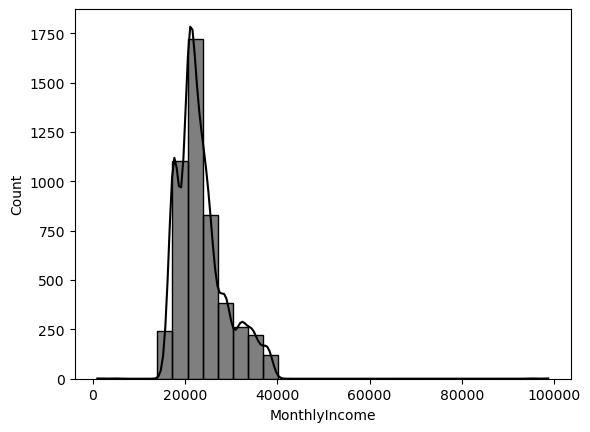

In [44]:
# MonthlyIncome
df_= df['MonthlyIncome']
df_N_bfill = df_.fillna(method='ffill', inplace=True)
sns.histplot(df_, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_N_bfill, bins=30, kde=True, color='purple', label='Imputed with missing technique')

# Imputing missing values with mode

In [45]:
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True) 

In [46]:
df.isna().sum() 

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

* All missing values Columns are Imputed with appropriate Imputing Techinique

####  **Type Casting**

In [47]:
df['ProdTaken'] = df['ProdTaken'].astype(object)  # Convert 'Age' to integer
df['Passport'] = df['Passport'].astype(object)  # Convert 'NumberOfFollowups' to integer
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].astype(object)  # Convert 'PreferredPropertyStar' to integer
df['OwnCar'] = df['OwnCar'].astype(object)  # Convert 'NumberOfTrips' to integer
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype(object)  # Convert 'NumberOfChildrenVisiting' to integer
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype(object)  # Convert 'MonthlyIncome' to integer
df['PreferredPropertyStar']=df['PreferredPropertyStar'].astype(object)
df['NumberOfPersonVisiting']=df['NumberOfPersonVisiting'].astype(object)
df['CityTier']=df['CityTier'].astype(object)
# Confirm the changes
print(df.dtypes)

CustomerID                    int64
ProdTaken                    object
Age                         float64
TypeofContact                object
CityTier                     object
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting       object
NumberOfFollowups            object
ProductPitched               object
PreferredPropertyStar        object
MaritalStatus                object
NumberOfTrips               float64
Passport                     object
PitchSatisfactionScore       object
OwnCar                       object
NumberOfChildrenVisiting     object
Designation                  object
MonthlyIncome               float64
dtype: object


## **Univariant Analysis**
### **Non Visualization Analysis**

### **Numerical Variables**

In [48]:
df.describe()

,CustomerID,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,37.584697,15.443331,3.254910,23539.350245
std,1411.188388,9.297737,8.479713,1.852798,5364.619055
min,200000.000000,18.000000,5.000000,1.000000,1000.000000
25%,201221.750000,31.000000,9.000000,2.000000,20228.000000
50%,202443.500000,36.000000,13.000000,3.000000,22217.500000
75%,203665.250000,44.000000,20.000000,4.000000,25527.750000
max,204887.000000,61.000000,127.000000,22.000000,98678.000000


#### **Categorical Variables**

In [49]:
df.describe(include=['object']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
NumberOfFollowups,4888.0,6.0,4.0,2113.0
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340


## Visualization -Numerical Variables

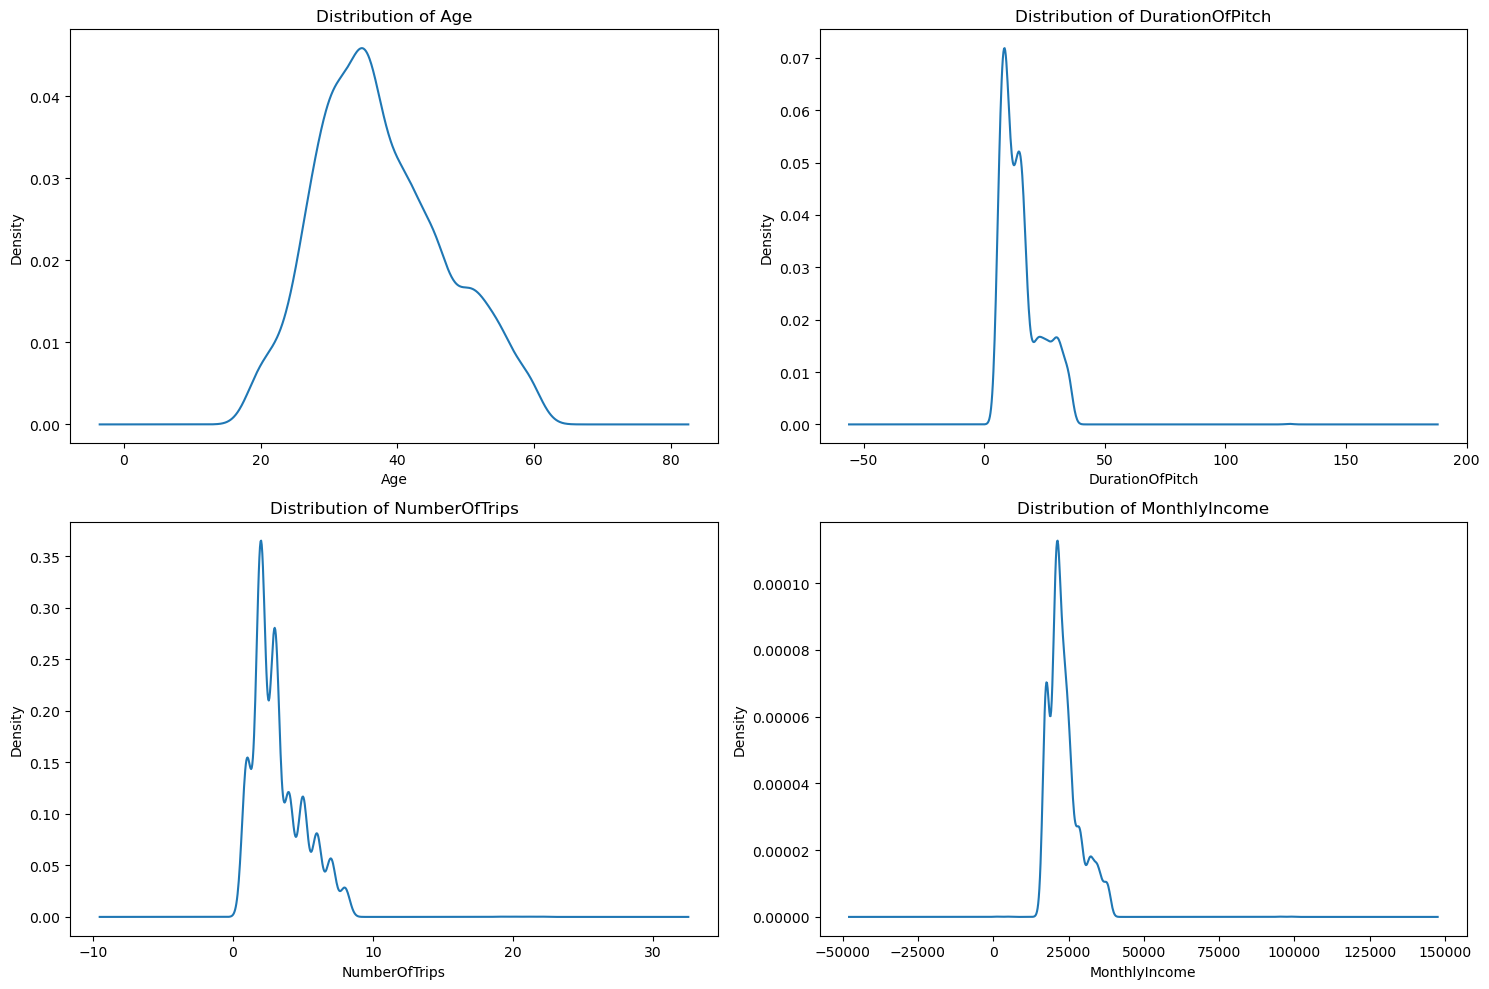

In [50]:
import matplotlib.pyplot as plt
import math

# Get the numerical columns from the DataFrame, excluding 'CustomerID'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['CustomerID'])

# Determine the number of plots required
num_plots = len(numerical_columns.columns)

# Calculate the number of rows and columns needed for subplots
nrows = math.ceil(num_plots / 2)
ncols = 2 if num_plots > 1 else 1

# Create subplots with an appropriate layout
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

# If there's only one subplot, axes is not an array, so we wrap it in a list
if num_plots == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Plot each numerical column
for i, column in enumerate(numerical_columns.columns):
    numerical_columns[column].plot(kind='kde', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Insights
* **Age:**
  * The distribution of customer ages is approximately normal, centered around a mean age of 37.6 years with a standard deviation of 9.3 years.
  * Insights suggest a single peak in the distribution, Most customers, approximately 75%, fall between the ages of 31 and 44 years, indicating a concentration of customers in this age range.
* **DurationOfPitch:**
   * Sales pitch durations exhibit a right-skewed distribution with a mean of 15.4 minutes and a standard deviation of 8.5 minutes, indicating variability.
  * Evidence of a bimodal distribution suggests two distinct groups of pitch durations, hinting at different types of sales pitches.
* **Number of Trips:**
   * Annual trip frequencies, skewed right with a mean of 3.25 trips and a standard deviation of 1.85, suggest variability.
  * A bimodal distribution indicates two distinct customer groups with differing travel behaviors or preferences.
* **Monthly Income:**
   * Monthly incomes, likely right-skewed with a mean of $23,539 and a standard deviation of $5,365, show variability
   * Evidence of a bimodal distribution suggests two distinct income groups, guiding targeted marketing and product strategies tailored to each segment.


## Detecting Outliers

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

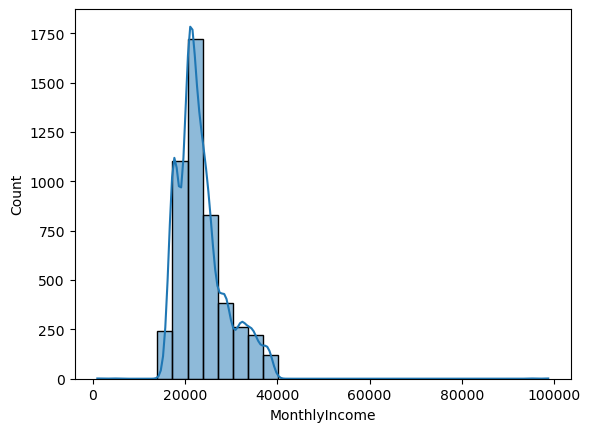

In [51]:
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)

<Axes: >

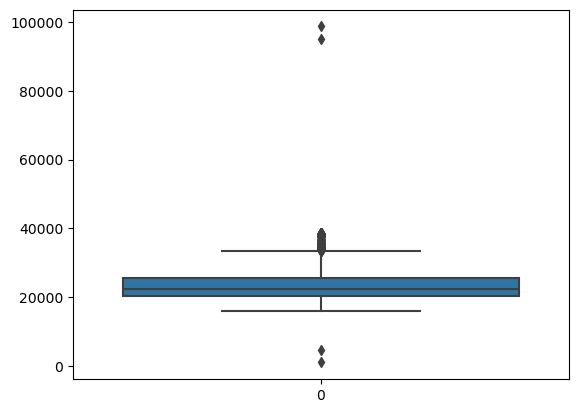

In [52]:
sns.boxplot(df['MonthlyIncome']) # 2 Extreme Outliers  & remaining closer outliers

<Axes: >

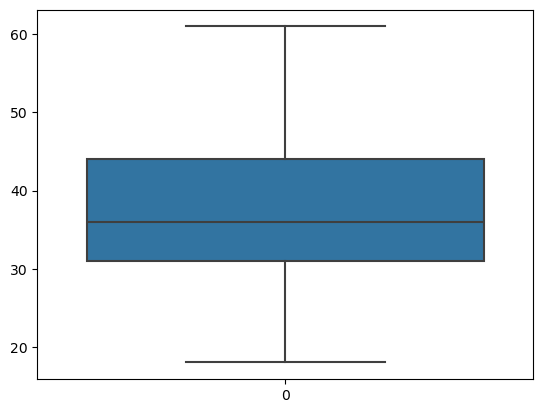

In [53]:
sns.boxplot(df['Age']) # No Outliers

<Axes: >

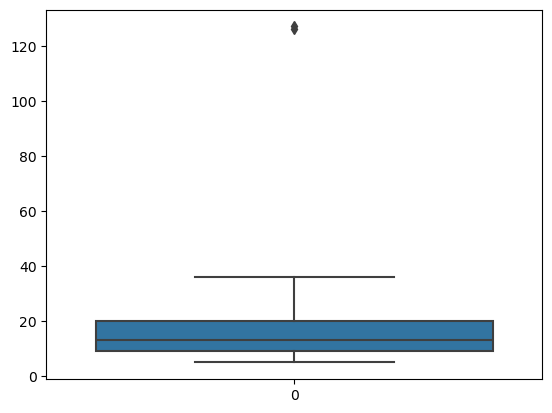

In [54]:
sns.boxplot(df['DurationOfPitch']) # 1 Extreme Outlier

<Axes: >

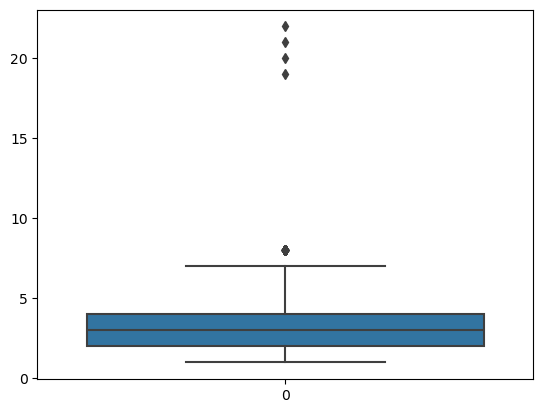

In [55]:
sns.boxplot(df['NumberOfTrips']) # 4 Extreme Outliers  & 1 Closer Outlier

### Insights
* **Age Distribution:** The box plot depicts a symmetric spread of customer ages, with the median age aligned within the interquartile range. Noteworthy absence of outliers suggests a uniform age distribution among customers.
* **Pitch Duration Distribution:** The box plot illustrates significant variability in sales pitch durations, skewed towards shorter presentations. However, an extreme outlier, nearly at 140, indicates a few specialized or detailed pitches extending far beyond the typical range
* **Trip Frequency Distribution:** The box plot reveals a right-skewed distribution in the number of trips taken annually, with most customers engaging in moderate travel frequency. Notable outliers at 18, 20, 22, and 24 trips signify a distinct group of frequent travelers within the customer base.
* **Income Distribution:** The box plot depicts a right-skewed spread of monthly incomes among customers, featuring numerous high-income outliers. Despite the majority falling within a narrower income range, notable outliers around 98,000 and 95,000 hint at the existence of distinct income cohorts within the customer base.


### **Handling Outliers**

In [56]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols[1:]

Index(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome'], dtype='object')

<Axes: >

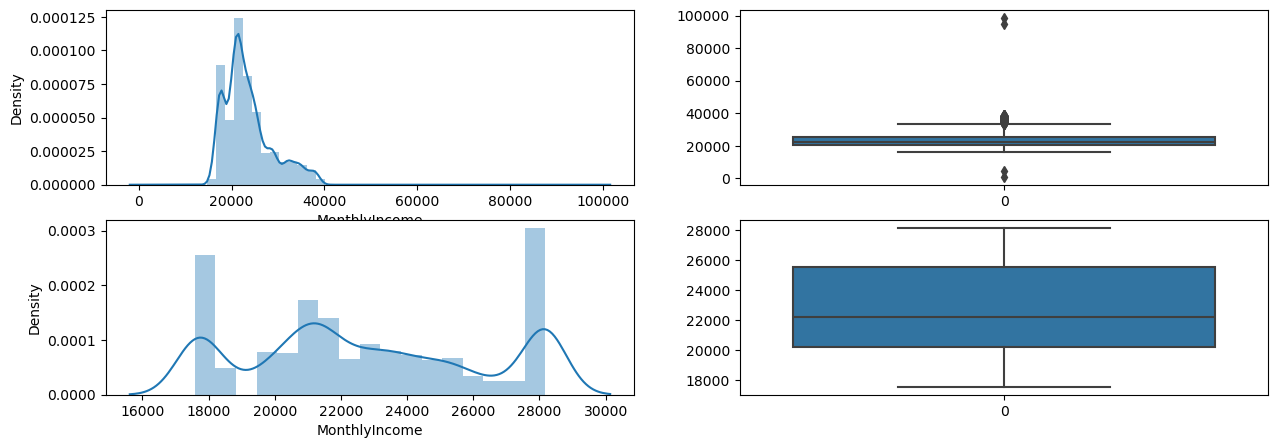

In [57]:
# Handling MonhtlyIncome column outliers using IQR
Q1, Q3 = df['MonthlyIncome'].quantile(.25), df['MonthlyIncome'].quantile(.75)
iqr = Q1 - Q3
lf, uf = max(df['MonthlyIncome'].min(), Q1 - 1.5 *iqr), min(df['MonthlyIncome'].max(), Q3 + 1.5 *iqr)
df_MonthlyIncome_before = df['MonthlyIncome'].copy()
df['MonthlyIncome'] = df['MonthlyIncome'].clip(lf, uf)

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.distplot(df_MonthlyIncome_before)
plt.subplot(2,2,2)
sns.boxplot(df_MonthlyIncome_before)

plt.subplot(2,2,3)
sns.distplot(df['MonthlyIncome'])
plt.subplot(2,2,4)
sns.boxplot(df['MonthlyIncome'])

<Axes: >

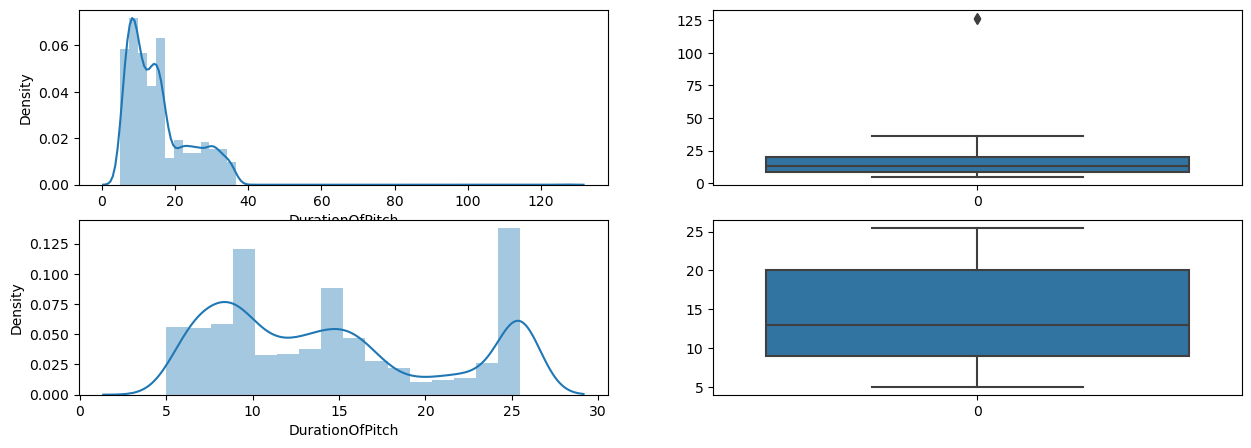

In [58]:
# Handling DurationOfPitch column outliers using IQR
Q1, Q3 = df['DurationOfPitch'].quantile(.25), df['DurationOfPitch'].quantile(.75)
iqr = Q1 - Q3
lf, uf = max(df['DurationOfPitch'].min(), Q1 - 1.5 *iqr), min(df['DurationOfPitch'].max(), Q3 + 1.5 *iqr)
df_DurationOfPitch_before = df['DurationOfPitch'].copy()
df['DurationOfPitch'] = df['DurationOfPitch'].clip(lf, uf)

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.distplot(df_DurationOfPitch_before)
plt.subplot(2,2,2)
sns.boxplot(df_DurationOfPitch_before)

plt.subplot(2,2,3)
sns.distplot(df['DurationOfPitch'])
plt.subplot(2,2,4)
sns.boxplot(df['DurationOfPitch'])

<Axes: >

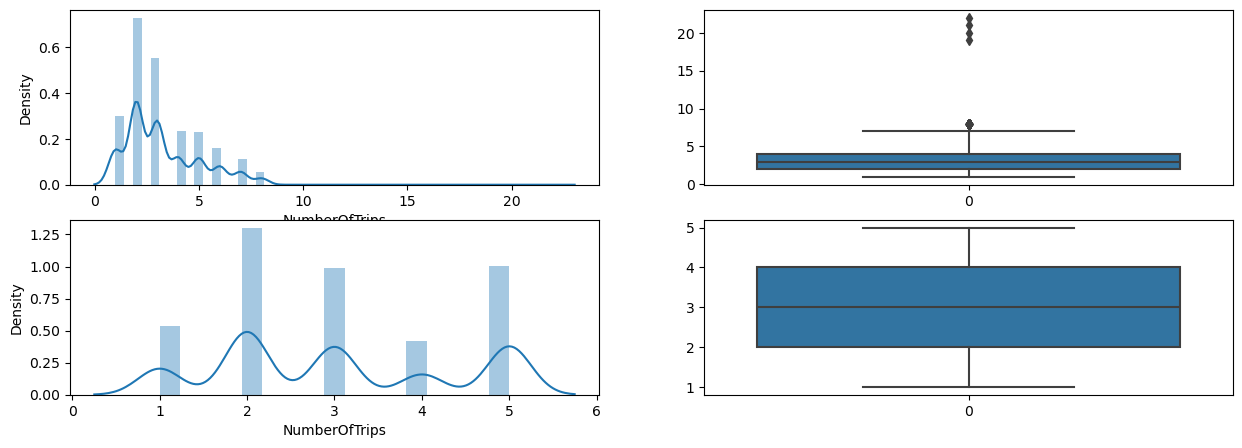

In [59]:
# Handling NumberOfTrips column outliers using IQR
Q1, Q3 = df['NumberOfTrips'].quantile(.25), df['NumberOfTrips'].quantile(.75)
iqr = Q1 - Q3
lf, uf = max(df['NumberOfTrips'].min(), Q1 - 1.5 *iqr), min(df['NumberOfTrips'].max(), Q3 + 1.5 *iqr)
df_NumberOfTrips_before = df['NumberOfTrips'].copy()
df['NumberOfTrips'] = df['NumberOfTrips'].clip(lf, uf)

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.distplot(df_NumberOfTrips_before)
plt.subplot(2,2,2)
sns.boxplot(df_NumberOfTrips_before)

plt.subplot(2,2,3)
sns.distplot(df['NumberOfTrips'])
plt.subplot(2,2,4)
sns.boxplot(df['NumberOfTrips'])

* All the outliers are treated

# Frequency Analysis - Categorical Variables

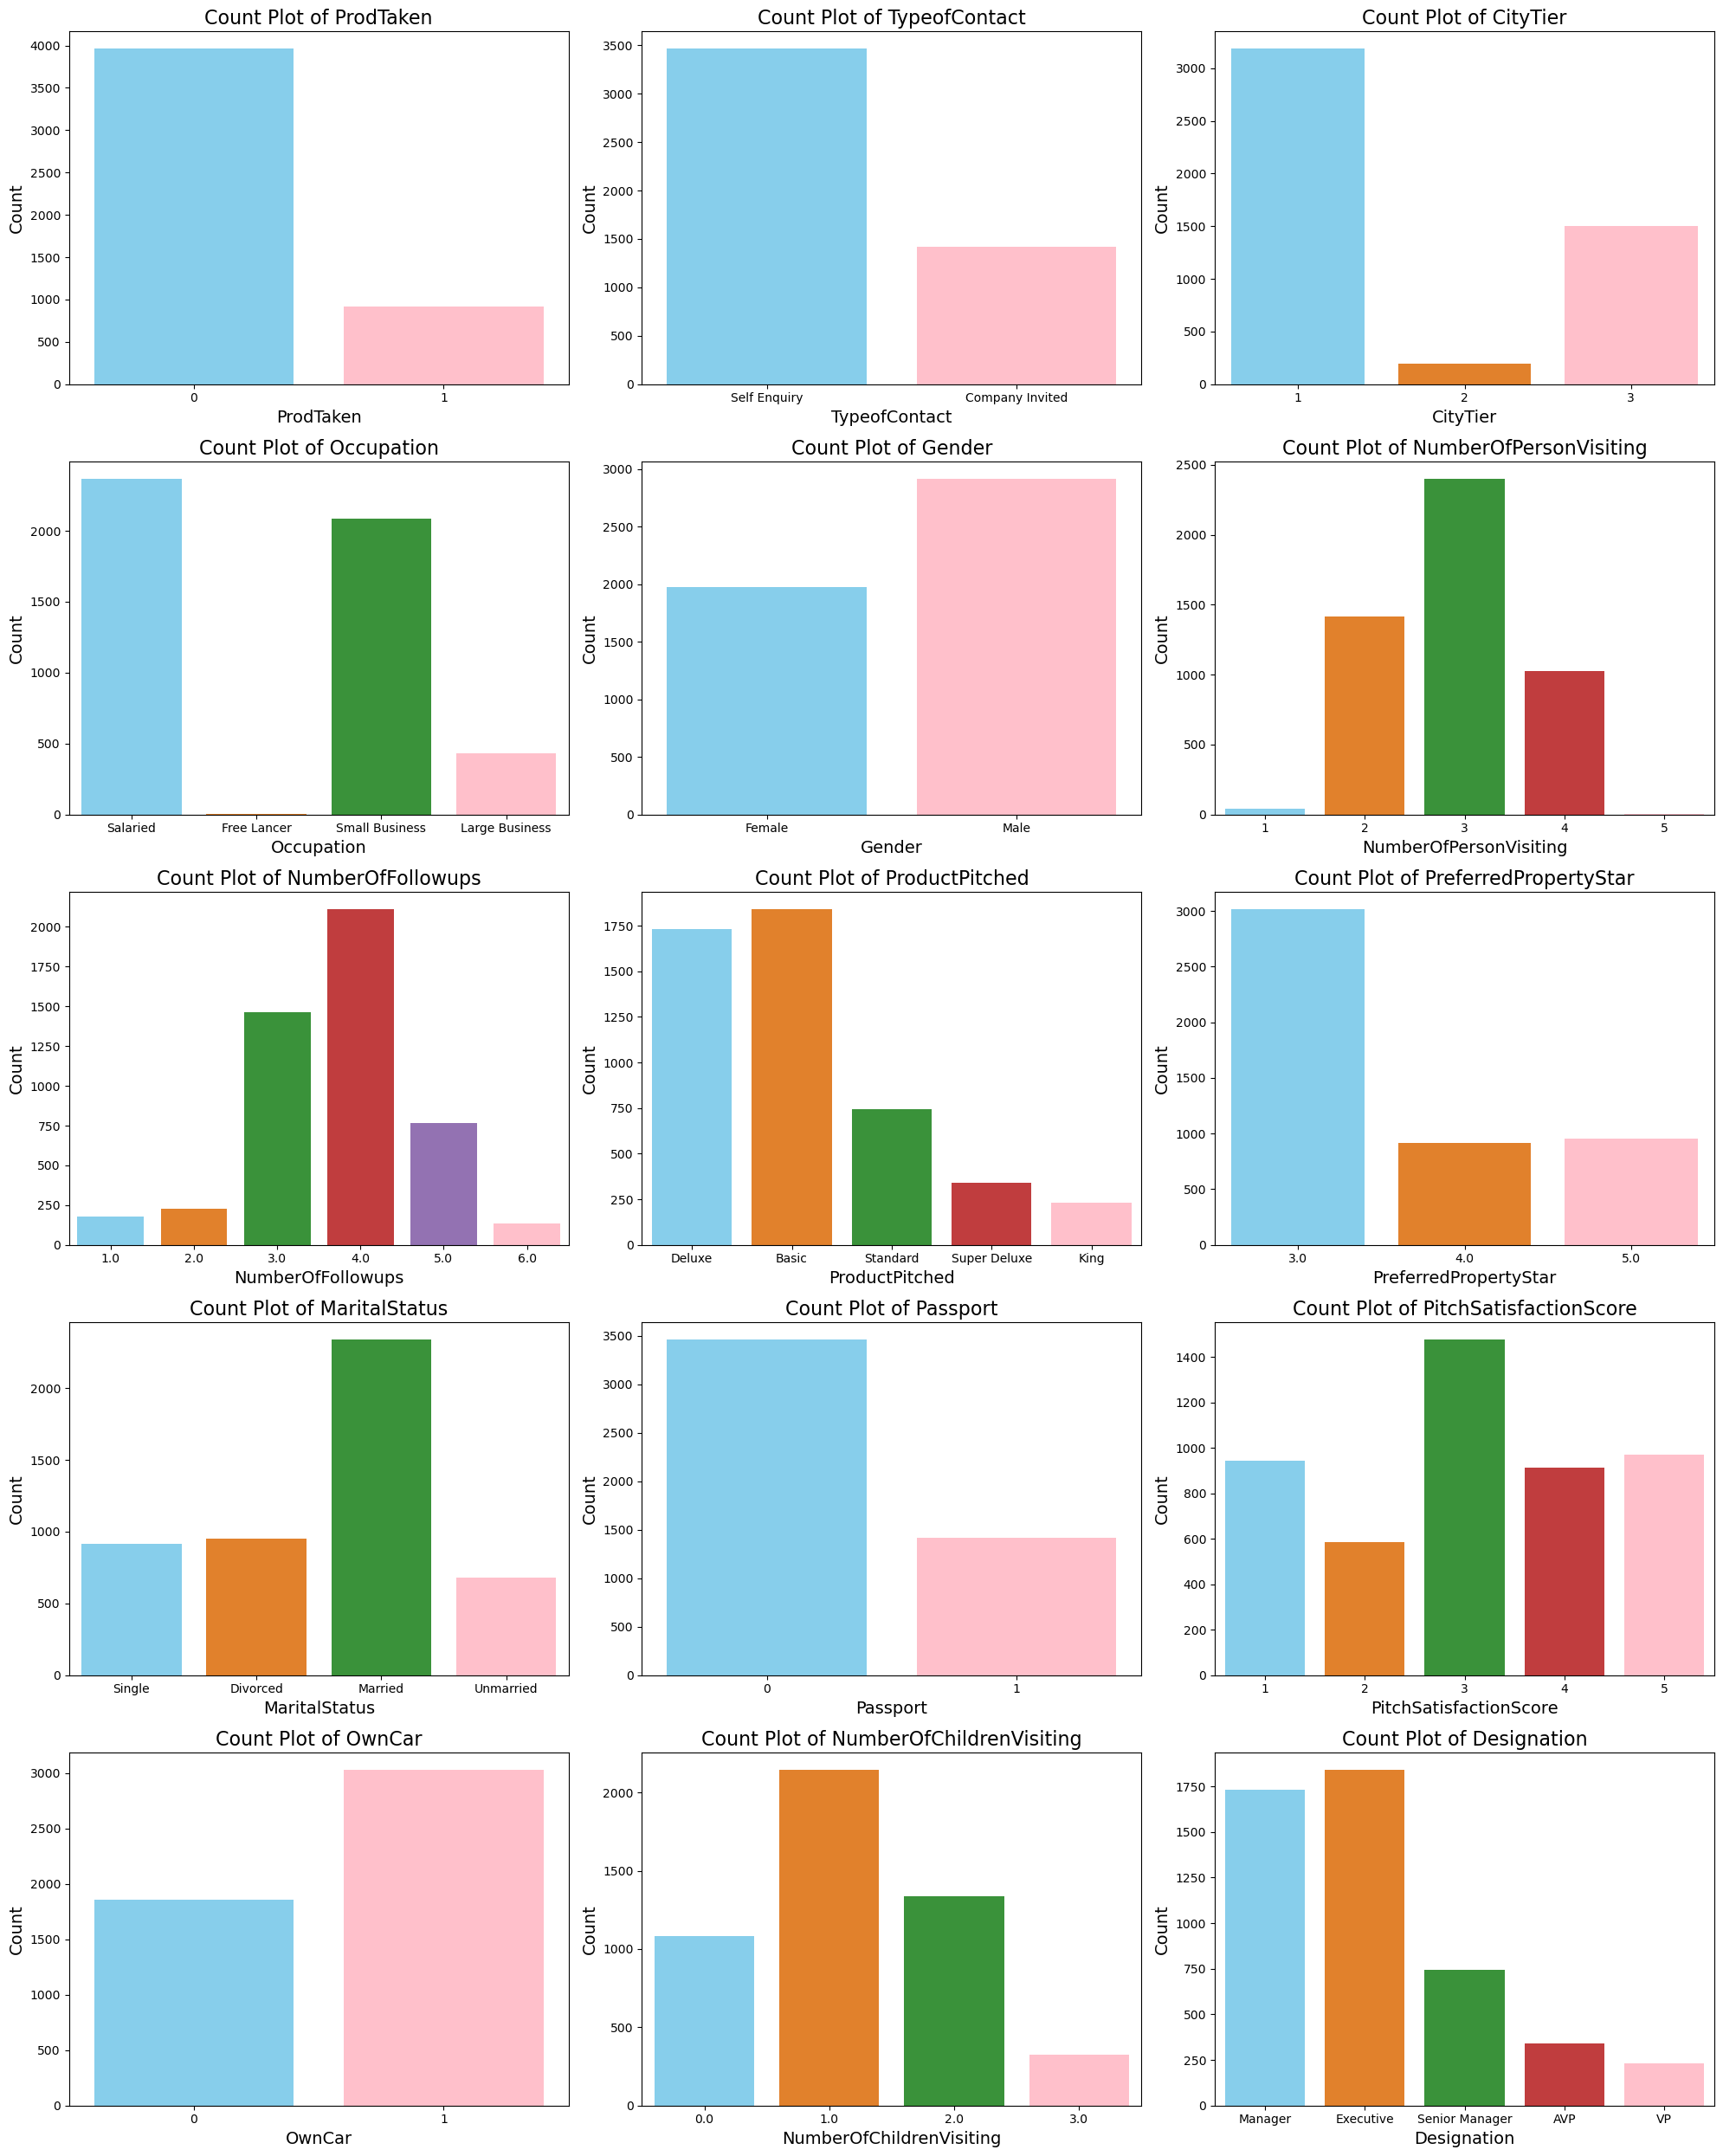

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include=['object'])

# Calculate the number of rows needed based on the number of categorical columns
num_rows = (len(categorical_columns.columns) + 2) // 3

# Create subplots with the calculated layout
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten the axes array
axes = axes.flatten()

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns.columns):
    # Count the frequency of each category
    category_counts = df[column].value_counts()

    # Get the category with the highest frequency
    highest_frequency_category = category_counts.idxmax()

    # Get the category with the lowest frequency
    lowest_frequency_category = category_counts.idxmin()

    # Plot count plot
    sns.countplot(x=column, data=df, ax=axes[i])

    # Highlight bars for highest and lowest frequency categories
    axes[i].patches[category_counts.index.get_loc(highest_frequency_category)].set_facecolor('skyblue')
    axes[i].patches[category_counts.index.get_loc(lowest_frequency_category)].set_facecolor('pink')

    axes[i].set_title(f'Count Plot of {column}', fontsize=16)  # Increase title font size
    axes[i].set_xlabel(column, fontsize=14)  # Increase x-axis label font size
    axes[i].set_ylabel('Count', fontsize=14)  # Increase y-axis label font size

# Hide empty subplots if there are fewer than 3 categorical columns
if len(categorical_columns.columns) % 3 != 0:
    for i in range(len(categorical_columns.columns) % 3, 3):
        fig.delaxes(axes[-i-1])

plt.tight_layout()
plt.show()


## **Bivariate-Analysis**

#### **Checking Correlation between numeric columns**

In [61]:
# Get the numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()
correlation_matrix

,CustomerID,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
CustomerID,1.000000,0.032695,0.065253,0.251483,0.342243
Age,0.032695,1.000000,-0.026348,0.208413,0.434951
DurationOfPitch,0.065253,-0.026348,1.000000,0.024418,0.015539
NumberOfTrips,0.251483,0.208413,0.024418,1.000000,0.190988
MonthlyIncome,0.342243,0.434951,0.015539,0.190988,1.000000


<Axes: >

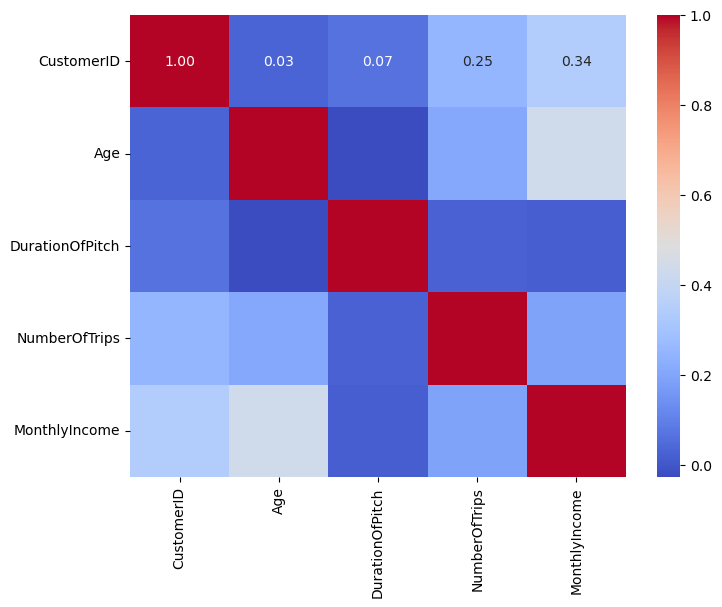

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [63]:
## Visualization Analysis

<Axes: title={'center': 'Age'}, xlabel='ProdTaken'>

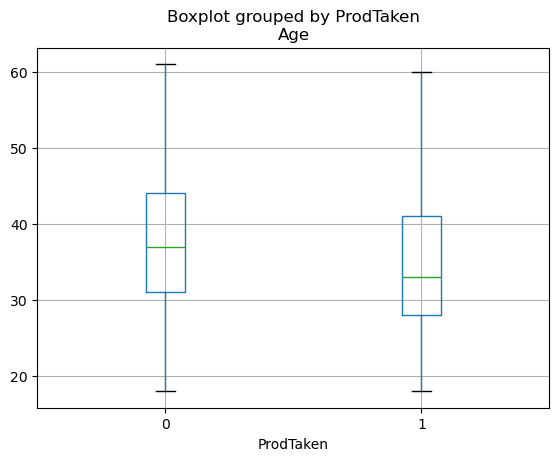

In [64]:
df.boxplot(by='ProdTaken', column='Age')

## **Insight for Age and ProdTaken:**
- Among customers who did not take the product, the middle 50% age range was between 32 and 45 years old.
- In contrast, for customers who took the product, the middle 50% age range was slightly lower, between 28 and 41 years old.
- This suggests that there's a tendency for younger customers to be more inclined towards purchasing the product, while older customers are less likely to do so. Targeting marketing efforts towards younger demographics could potentially improve conversion rates.

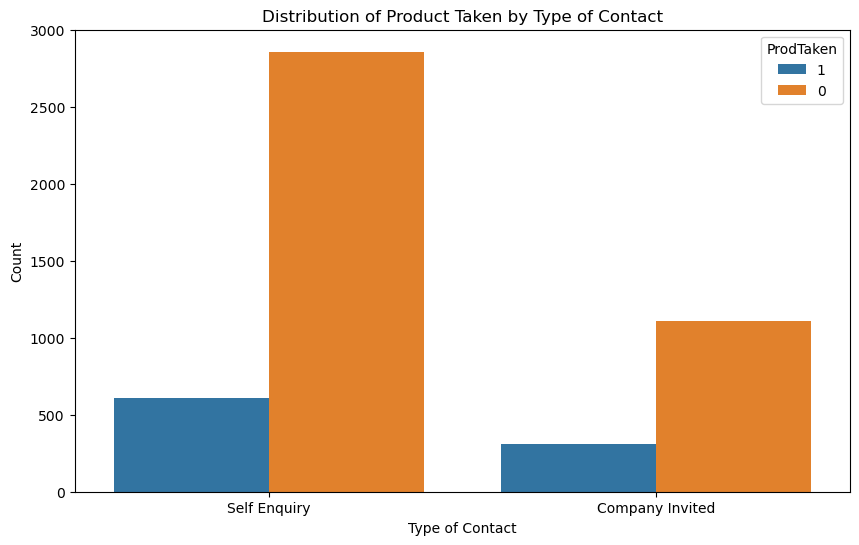

In [65]:
plt.figure(figsize=(10, 6))
df['ProdTaken'] = df['ProdTaken'].astype(str)

sns.countplot(data=df, x='TypeofContact', hue='ProdTaken')
plt.title('Distribution of Product Taken by Type of Contact')
plt.xlabel('Type of Contact')
plt.ylabel('Count')
plt.legend(title='ProdTaken', loc='upper right')
plt.show()

## **Insights for Type of Contact and Product Taken:**
- Customers who initiated contact themselves (Self Inquiry) tended to have higher instances of both product taken and not taken compared to those who were contacted by the company.
- This indicates that self-inquiry customers are more proactive in their decision-making process and are likely more engaged with the product offerings.
- Therefore, focusing on engaging with potential customers who initiate contact could lead to higher conversion rates, as they may already have a stronger interest in the product.


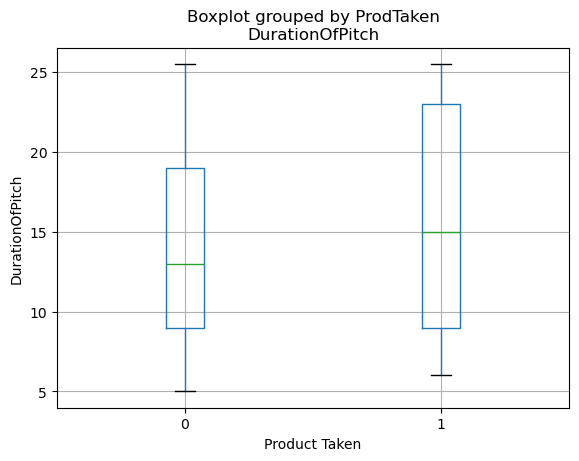

In [66]:
df.boxplot(by='ProdTaken', column='DurationOfPitch')
plt.xlabel('Product Taken')
plt.ylabel('DurationOfPitch')
plt.show()

## **Insights for Duration of Pitch and Product Taken:**
- Customers who eventually took the product were typically engaged in longer sales pitches, with a middle 50% duration ranging from 9 to 23 units.
- Conversely, customers who didn't take the product experienced slightly shorter pitches, with a middle 50% duration ranging from 8 to 18 units.
- This suggests that a more detailed and comprehensive sales pitch might be more effective in persuading customers to make a purchase.
- Therefore, from a business perspective, ensuring that sales pitches are sufficiently informative and engaging, while also respecting customers' time, could enhance the likelihood of converting leads into sales.

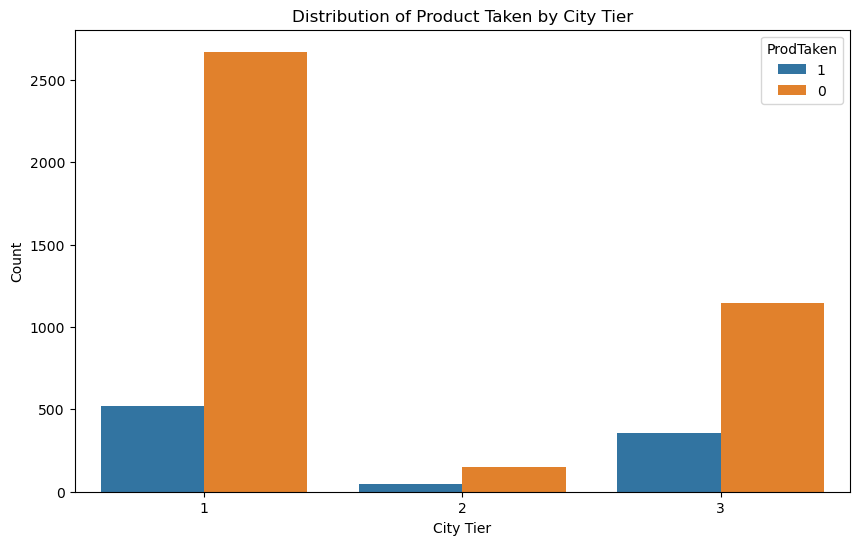

In [67]:
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.countplot(data=df, x='CityTier', hue='ProdTaken')

# Add titles and labels
plt.title('Distribution of Product Taken by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.legend(title='ProdTaken', loc='upper right')

# Display the plot
plt.show()

## **Insights for City Tier and Product Taken:**
- Tier 1 cities exhibited the highest frequency of both product taken and not taken instances, followed by Tier 3 cities, and then Tier 2 cities.
- This suggests that customers from Tier 1 cities are more actively engaged in purchasing decisions compared to those from Tier 2 and Tier 3 cities.
- Utilize localized advertising through regional media channels to resonate with Tier 2 and Tier 3 city residents.
- Educate communities through workshops, offering tailored packages highlighting affordability and nearby cultural experiences.
- Foster regional partnerships, incentivize referrals, and provide localized customer support to enhance engagement and drive sales.


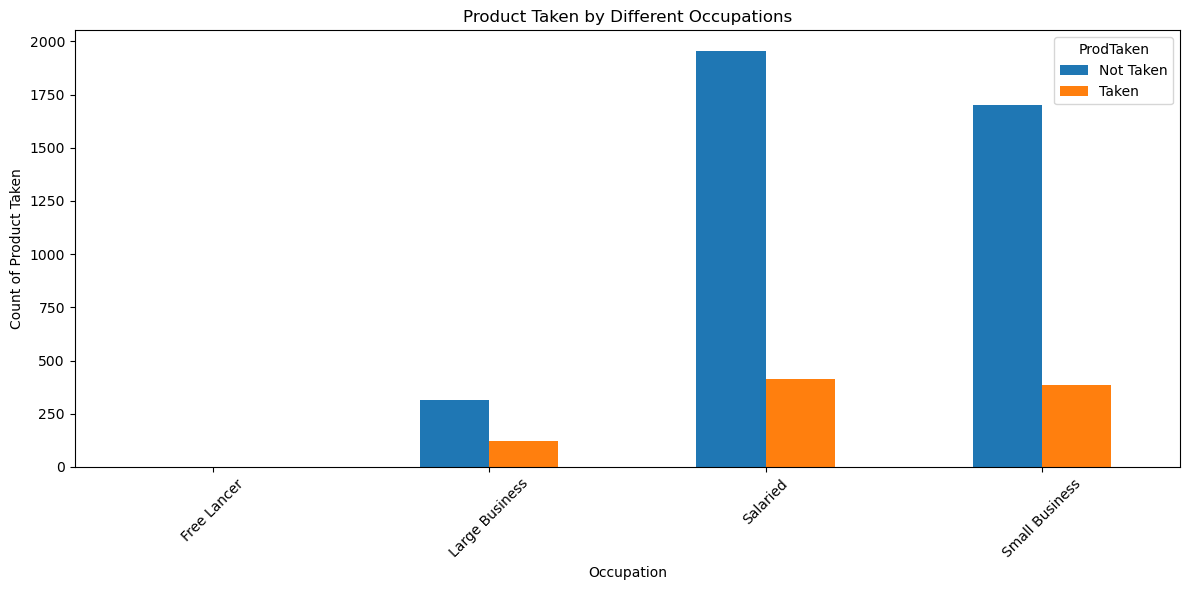

In [68]:
occupation_grouped = df.groupby(['Occupation', 'ProdTaken']).size().unstack(fill_value=0)
occupation_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Product Taken by Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count of Product Taken')
plt.xticks(rotation=45)
plt.legend(title='ProdTaken', labels=['Not Taken', 'Taken'])
plt.tight_layout()
plt.show()

## **Insights for Occupation and Product Taken:**
- The product is more frequently taken by individuals in salaried and small business occupations.
- Conversely, a significant proportion of individuals who haven't taken the product also belong to salaried and small business occupations.
- Individuals in large business occupations show lower engagement with both product taken and not taken instances.

**Recommendations:**
- Since approximately 70% of customers are from salaried and small business occupations, allocating more sales resources and time towards these categories could significantly increase sales.
- Providing additional attention and tailored offerings to customers in salaried and small business occupations may lead to higher conversion rates and customer satisfaction.

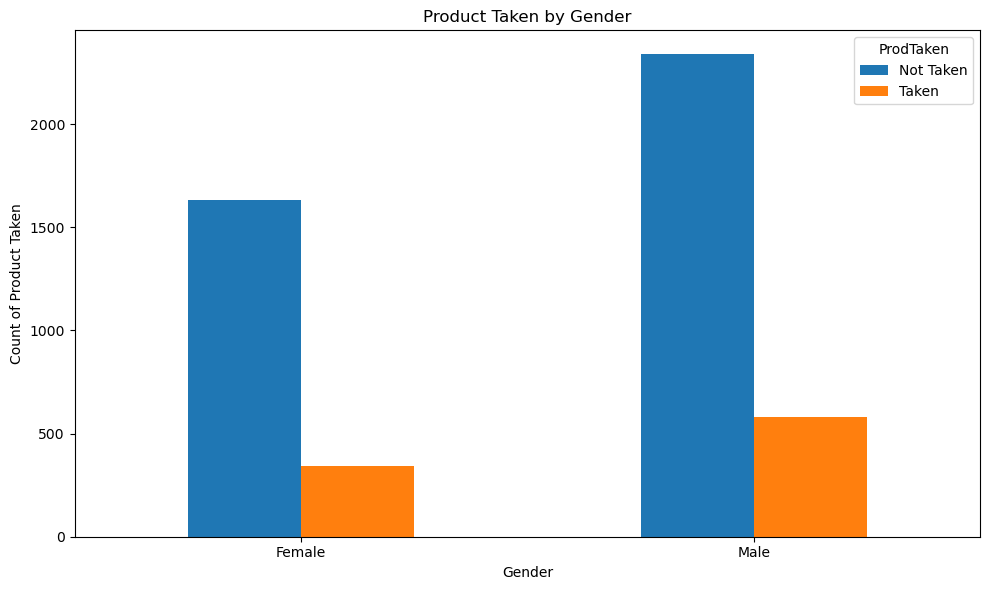

In [69]:
gender_grouped = df.groupby(['Gender', 'ProdTaken']).size().unstack(fill_value=0)
gender_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Product Taken by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Product Taken')
plt.xticks(rotation=0)
plt.legend(title='ProdTaken', labels=['Not Taken', 'Taken'])
plt.tight_layout()
plt.show()

## **Insights for Gender and Product Taken:**
- Males constitute a larger portion of customers who haven't taken the product compared to females.
- Conversely, more customers who have taken the product are males.
  
**Recommendations:**
- With 59% of customers being male and 41% female (without product), allocating additional marketing efforts towards male customers could lead to increased sales.
- Providing targeted promotions or incentives tailored to male preferences and interests may enhance engagement and drive higher conversion rates.

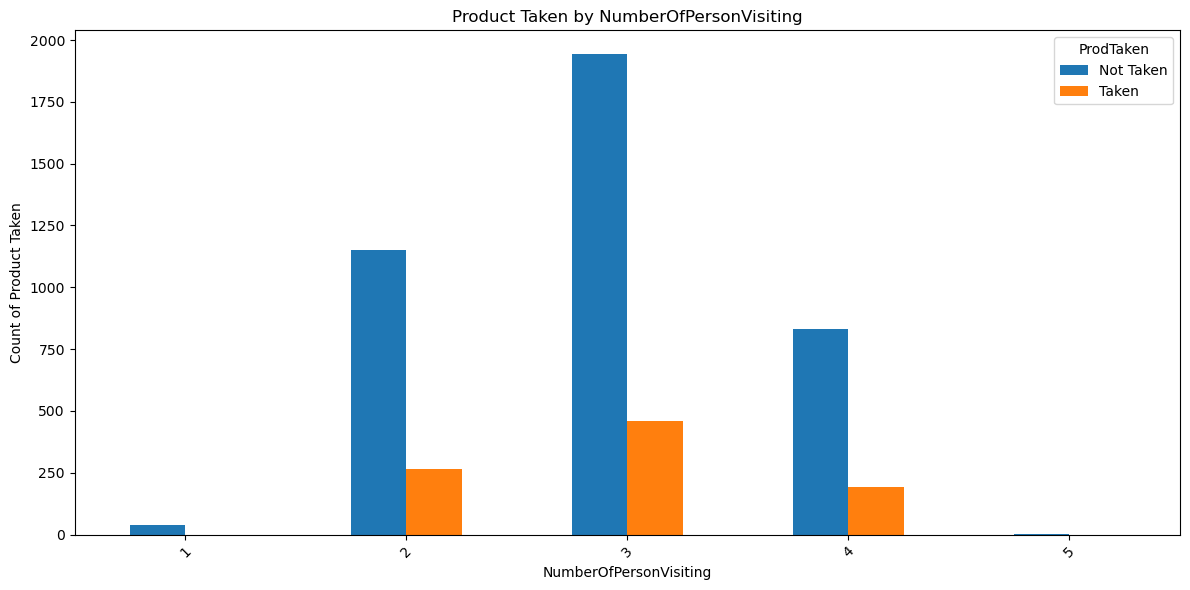

In [70]:
occupation_grouped = df.groupby(['NumberOfPersonVisiting', 'ProdTaken']).size().unstack(fill_value=0)
occupation_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Product Taken by NumberOfPersonVisiting')
plt.xlabel('NumberOfPersonVisiting')
plt.ylabel('Count of Product Taken')
plt.xticks(rotation=45)
plt.legend(title='ProdTaken', labels=['Not Taken', 'Taken'])
plt.tight_layout()
plt.show()

## **Insights for Number of Persons Visiting and Product Taken:**
- Trips with 3 people visiting are most common and this group has a higher proportion of product taken instances compared to other group sizes (1, 2, 4).
- Single individuals visiting trips are relatively rare, with the majority of customers traveling in groups of 2 or more.

**Recommendations:**
- Targeting promotions or packages tailored for groups of 3 could capitalize on the popularity of this group size and potentially increase product uptake.
- While singles visiting trips are less common, exploring strategies to attract this demographic, such as solo traveler-friendly packages or incentives, could tap into an underserved market segment and broaden the customer base.

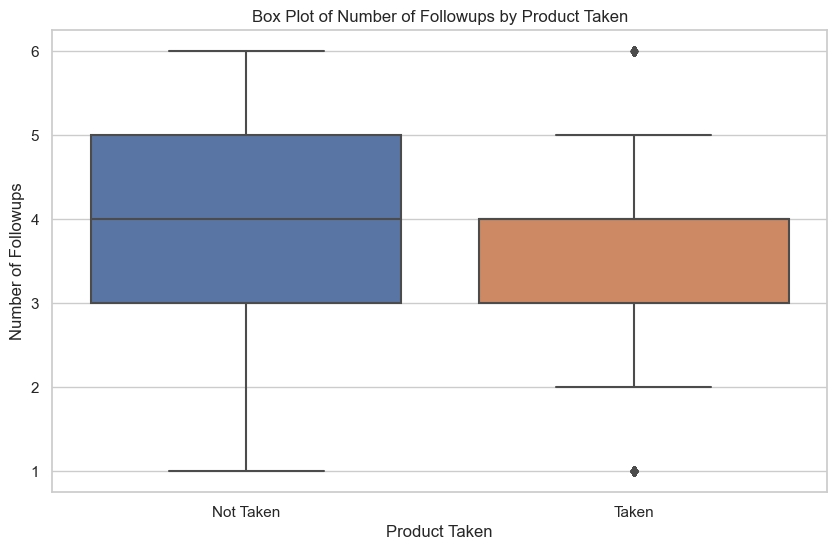

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProdTaken', y='NumberOfFollowups', data=df)
plt.title('Box Plot of Number of Followups by Product Taken')
plt.xlabel('Product Taken')
plt.ylabel('Number of Followups')
plt.xticks([0, 1], ['Not Taken', 'Taken'])
plt.show()

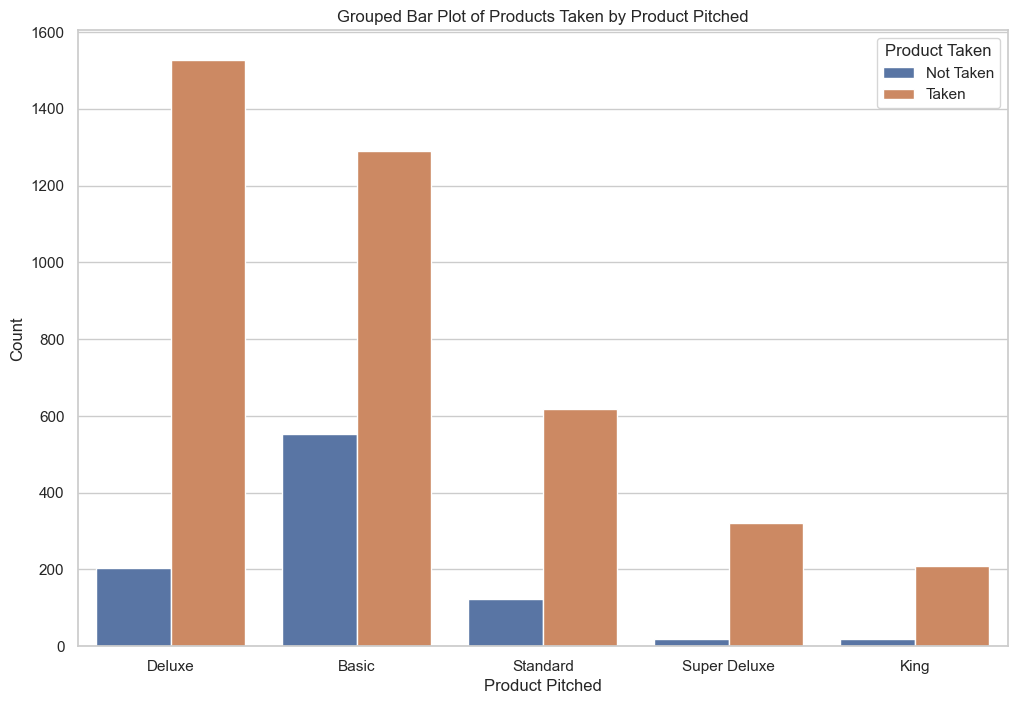

In [72]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(x='ProductPitched', hue='ProdTaken', data=df)

plt.title('Grouped Bar Plot of Products Taken by Product Pitched')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])

plt.show()

## **Insights for Product Pitched and Product Taken:**
- The majority of customers who took the product were pitched the Basic package, with around 580 customers.
- Customers who didn't take the product are predominantly from the Deluxe and Basic packages, with counts of approximately 1800 and 1300 respectively.
- King and Super Deluxe packages have fewer customers overall, with very few instances of product taken.

**Recommendations:**
- Since the majority of customers without product taken are from the Deluxe, Basic, and Standard packages, focusing sales efforts on these categories could potentially increase sales.
- Tailoring marketing strategies or offering incentives specifically for customers pitched the Deluxe, Basic, and Standard packages may improve conversion rates and drive higher product uptake.

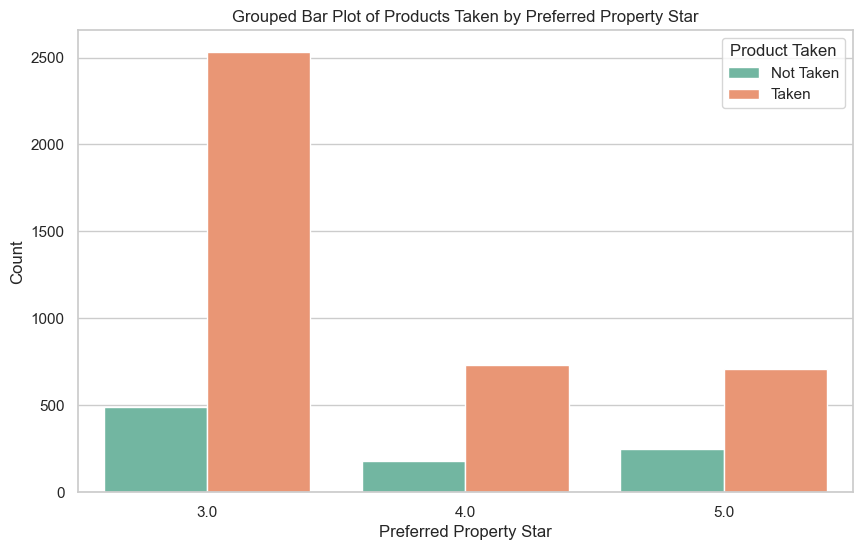

In [73]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredPropertyStar', hue='ProdTaken', data=df, palette='Set2')

plt.title('Grouped Bar Plot of Products Taken by Preferred Property Star')
plt.xlabel('Preferred Property Star')
plt.ylabel('Count')
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])

plt.show()

## **Insights for Preferred Property Star and Product Taken:**
- The majority of customers who didn't prefer the product opted for 3-star hotels, with a count of 2550, while those who took the product from this category were nearly 500.
- Customers preferring 4-star and 5-star hotels show similar distributions for both product not taken and taken instances, with counts around 750 for each.
- There's a slightly higher preference for 5-star hotels among customers who took the product compared to those preferring 4-star hotels.

**Recommendations:**
- Since a significant number of customers who didn't prefer the product opted for 3-star hotels, targeting marketing efforts towards this segment could potentially increase product uptake.
- Recognizing the preference for higher-rated hotels among customers who took the product, offering exclusive deals or incentives for 5-star hotel packages may further encourage sales and enhance customer satisfaction.

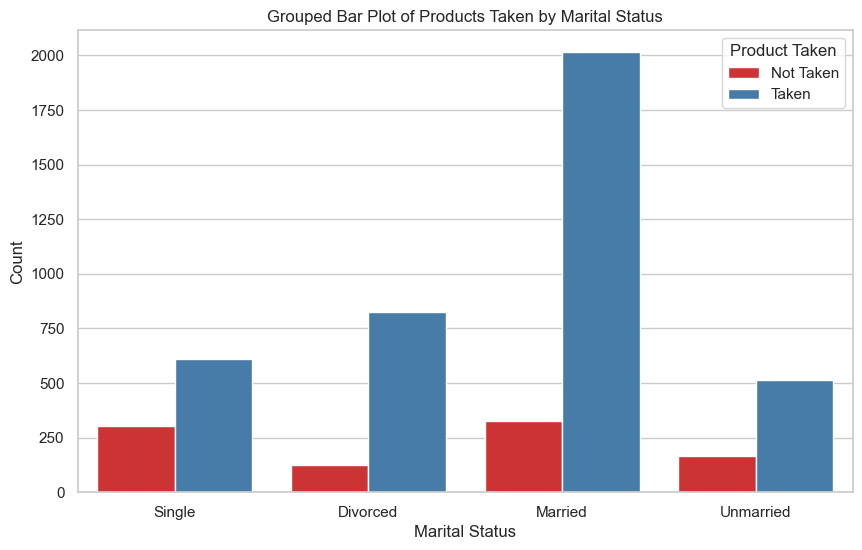

In [74]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='ProdTaken', data=df, palette='Set1')

plt.title('Grouped Bar Plot of Products Taken by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])

plt.show()

## **Insights for Marital Status and Product Taken:**
- Married customers comprise the majority of visitors, yet they have a lower likelihood of taking the product.
- Both married and single individuals show higher instances of product taken compared to divorced individuals.
- Divorced individuals have the least engagement with product taken instances.

**Recommendations:**
- Given that 40% of customers are married, offering tailored promotions or packages for couples could effectively target this demographic and potentially boost sales.
- Providing incentives or discounts for couples' packages may entice more married individuals to take the product, thereby increasing overall conversion rates and revenue.

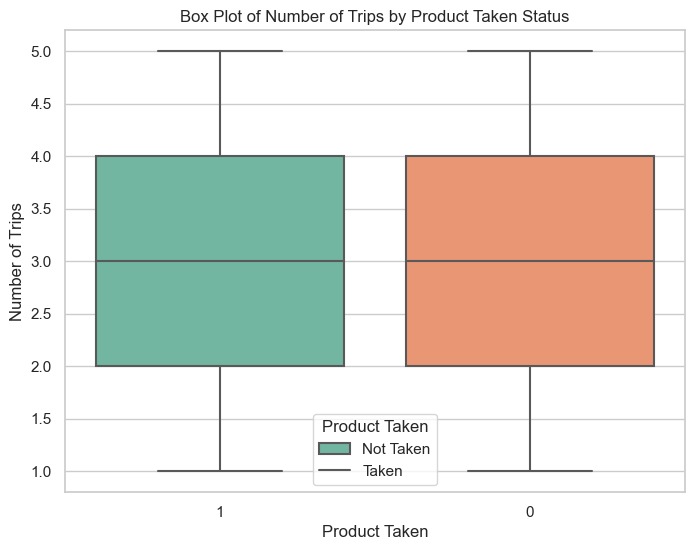

In [75]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='ProdTaken', y='NumberOfTrips', data=df, palette='Set2')

plt.title('Box Plot of Number of Trips by Product Taken Status')
plt.xlabel('Product Taken')
plt.ylabel('Number of Trips')
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])

plt.show()

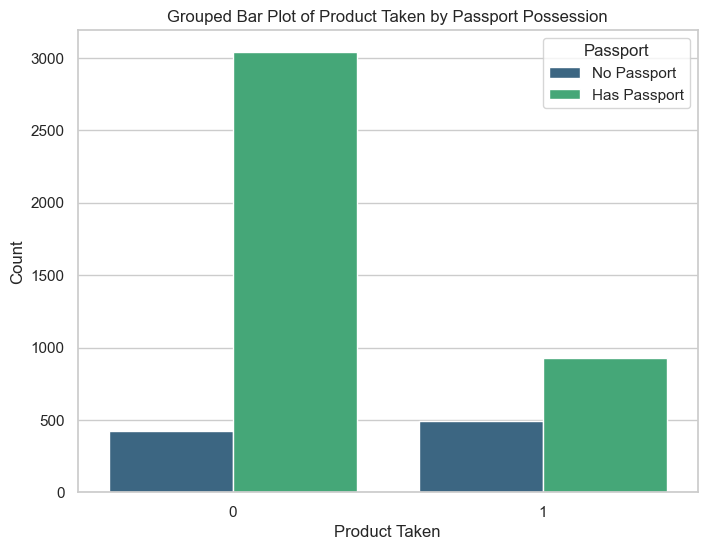

In [76]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(hue='ProdTaken', x='Passport', data=df, palette='viridis')

plt.title('Grouped Bar Plot of Product Taken by Passport Possession')
plt.xlabel('Product Taken')
plt.ylabel('Count')

plt.legend(title='Passport', labels=['No Passport', 'Has Passport'])

plt.show()

**Insights for Passport and Product Taken:**
- Customers without passports have a higher count of not taking the product, exceeding 3000 instances.
- Conversely, customers with passports who didn't take the product have a count of 900.
- Customers with passports who took the product have a count of nearly 500, while those without passports and took the product are below 500 instances.


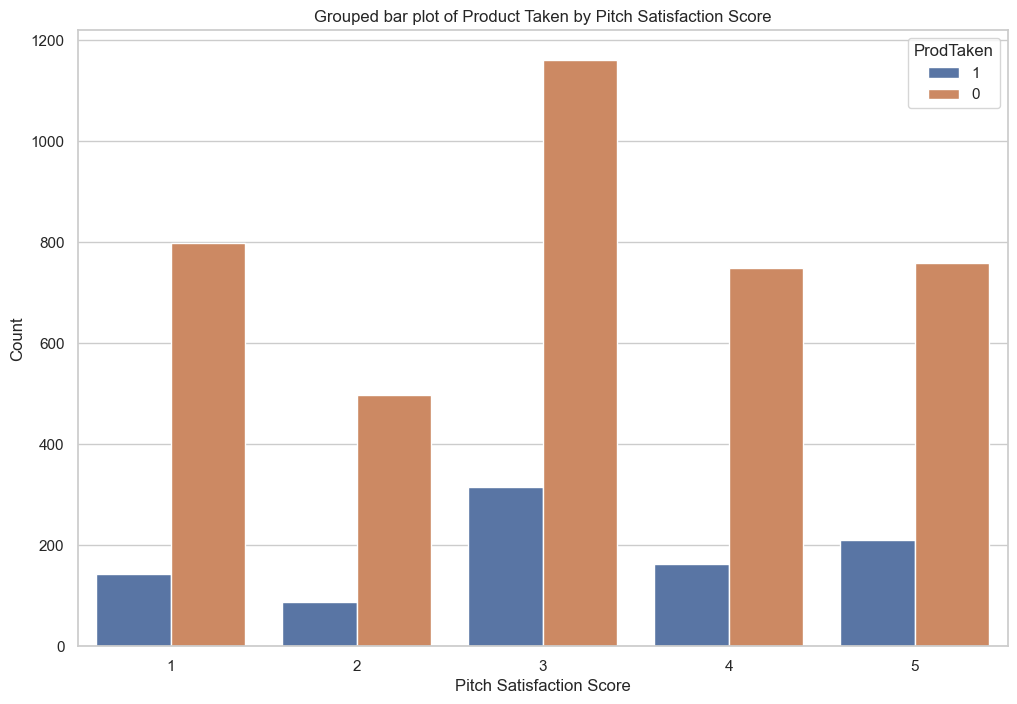

In [77]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='PitchSatisfactionScore', hue='ProdTaken')
plt.title('Grouped bar plot of Product Taken by Pitch Satisfaction Score')
plt.xlabel('Pitch Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='ProdTaken', loc='upper right')
plt.show()

**Insights for Product Taken by Pitch Satisfaction Score:**
- The majority of product taken instances correspond to satisfaction scores of 3, 4, and 5, with score 3 being the highest.
- Similarly, for instances where the product was not taken, satisfaction scores of 3, 4, and 5 are predominant, with score 3 being the highest.
- There is a lower frequency of product taken instances associated with satisfaction score 2 compared to other scores.

**Recommendations:**
- Given the significant presence of product taken instances across satisfaction scores 3, 4, and 5, focusing on maintaining or improving satisfaction levels within this range could lead to higher conversion rates.
- Addressing concerns or feedback associated with satisfaction score 2 may help mitigate barriers to product uptake and potentially increase sales.

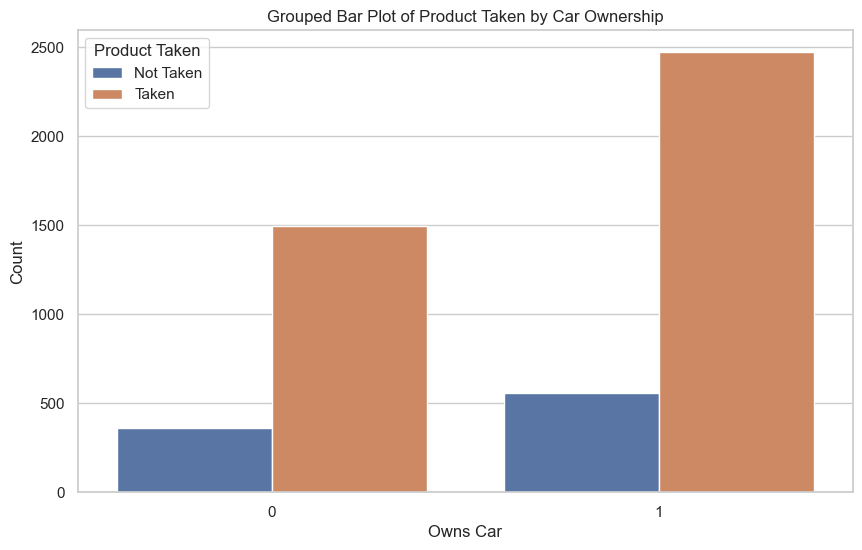

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OwnCar', hue='ProdTaken', data=df)
plt.title('Grouped Bar Plot of Product Taken by Car Ownership')
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])
plt.show()

**Insights for Product Taken by Car Ownership:**
- Customers who own cars show a higher count of both product taken and not taken instances compared to those who don't own cars.

**Recommendations:**
- Given the higher engagement levels among customers who own cars, targeting marketing efforts towards this demographic could lead to increased product uptake and sales.
- Offering incentives or promotions specifically tailored for customers who own cars may further encourage them to take the product, thereby enhancing overall sales performance.

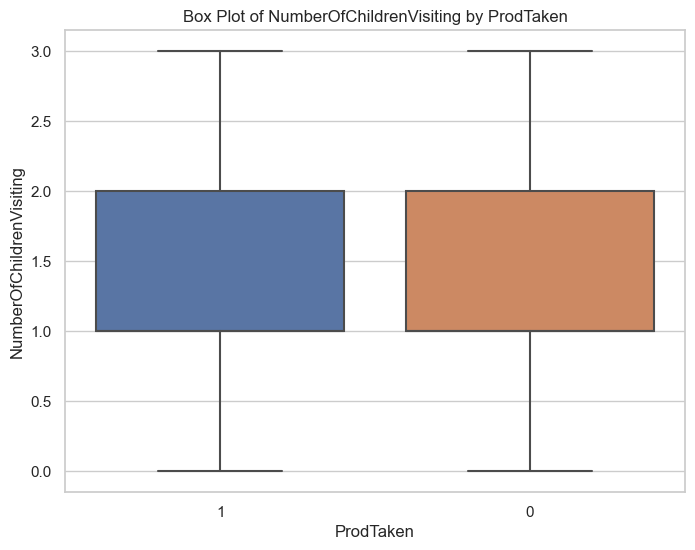

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProdTaken', y='NumberOfChildrenVisiting', data=df)
plt.title('Box Plot of NumberOfChildrenVisiting by ProdTaken')
plt.xlabel('ProdTaken')
plt.ylabel('NumberOfChildrenVisiting')
plt.show()

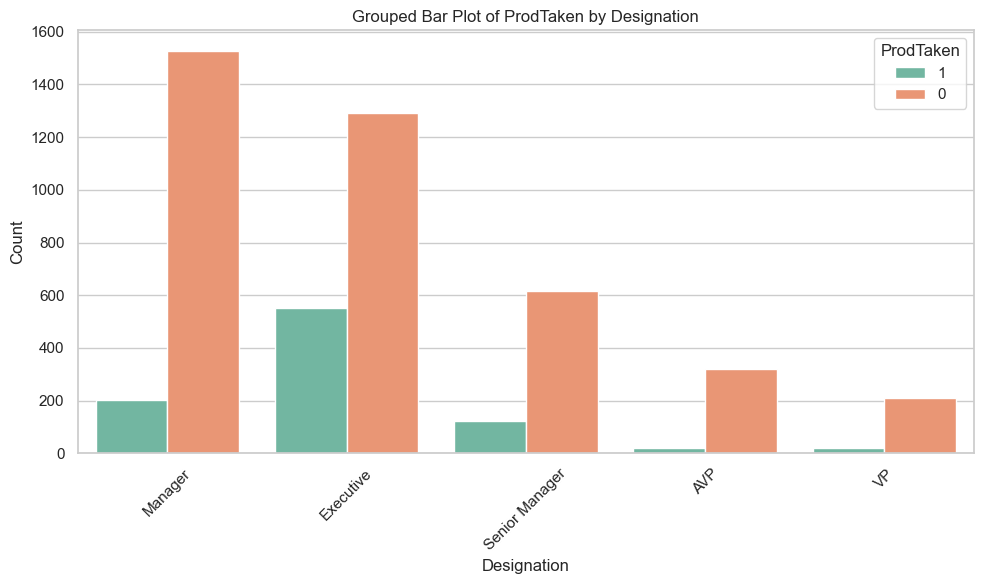

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Designation', hue='ProdTaken', palette='Set2')
plt.title('Grouped Bar Plot of ProdTaken by Designation')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='ProdTaken', loc='upper right')
plt.tight_layout()
plt.show()

**Insights for Designation and Product Taken:**
- The majority of customers who haven't taken the product belong to the Manager and Executive designations, with counts of 1500 and 1300 respectively.
- Senior Managers also show a significant count of not taking the product, with 600 instances.
- The highest number of customers who took the product are Executives, with a count of 580.
- There is a relatively low engagement from AVP and VP designations in both product taken and not taken instances.

**Recommendations:**
- Focusing marketing efforts on Executives, who have shown higher instances of product uptake, could yield improved conversion rates.
- Tailoring promotions or packages to cater to the preferences and needs of Managers and Executives may help increase their engagement and drive product uptake.
- Further analysis and targeted strategies may be necessary to understand and address the lower engagement levels from AVP and VP designations.

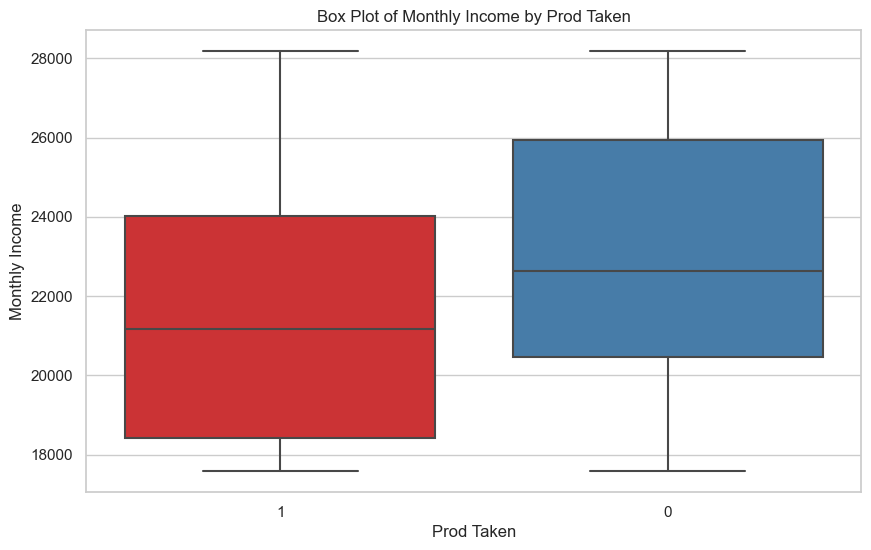

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ProdTaken', y='MonthlyIncome', palette='Set1')
plt.title('Box Plot of Monthly Income by Prod Taken')
plt.xlabel('Prod Taken')
plt.ylabel('Monthly Income')
plt.show()

**Insights for Monthly Income and Product Taken:**
- For customers who haven't taken the product, the middle 50% income range was from 20500 to 26000.
- Conversely, for customers who took the product, the middle 50% income range was slightly lower, from 18500 to 24000.

**Recommendations:**
- Targeting marketing efforts towards customers within the income range of 18500 to 24000, where product uptake is higher, could lead to improved conversion rates.
- Offering tailored promotions or incentives that align with the preferences and budget constraints of customers in this income bracket may further encourage product uptake and drive sales.

# **Insights:**
- The target variable, product taken, shows a significant relationship with several key columns, including monthly income, designation, car ownership, passport ownership, marital status, duration of pitch, and type of contact.
- Customers with specific income ranges, occupations, car and passport ownership, marital statuses, shorter pitch durations, and self-initiated contacts tend to have higher instances of product uptake.
- Understanding these relationships allows for targeted marketing strategies and personalized approaches to increase product uptake and overall sales.

 # **Recommendations:**
- Focus marketing efforts on customer segments identified with higher instances of product uptake, such as those with certain income ranges, specific occupations, and ownership of cars and passports.
- Tailor sales pitches and promotional offers to address the preferences and behaviors associated with increased product uptake, such as shorter pitch durations and self-initiated contacts.
- Continuously monitor and analyze customer data to adapt marketing tactics and optimize sales strategies for maximum effectiveness.

## All Numerical Variable vs Prodtaken

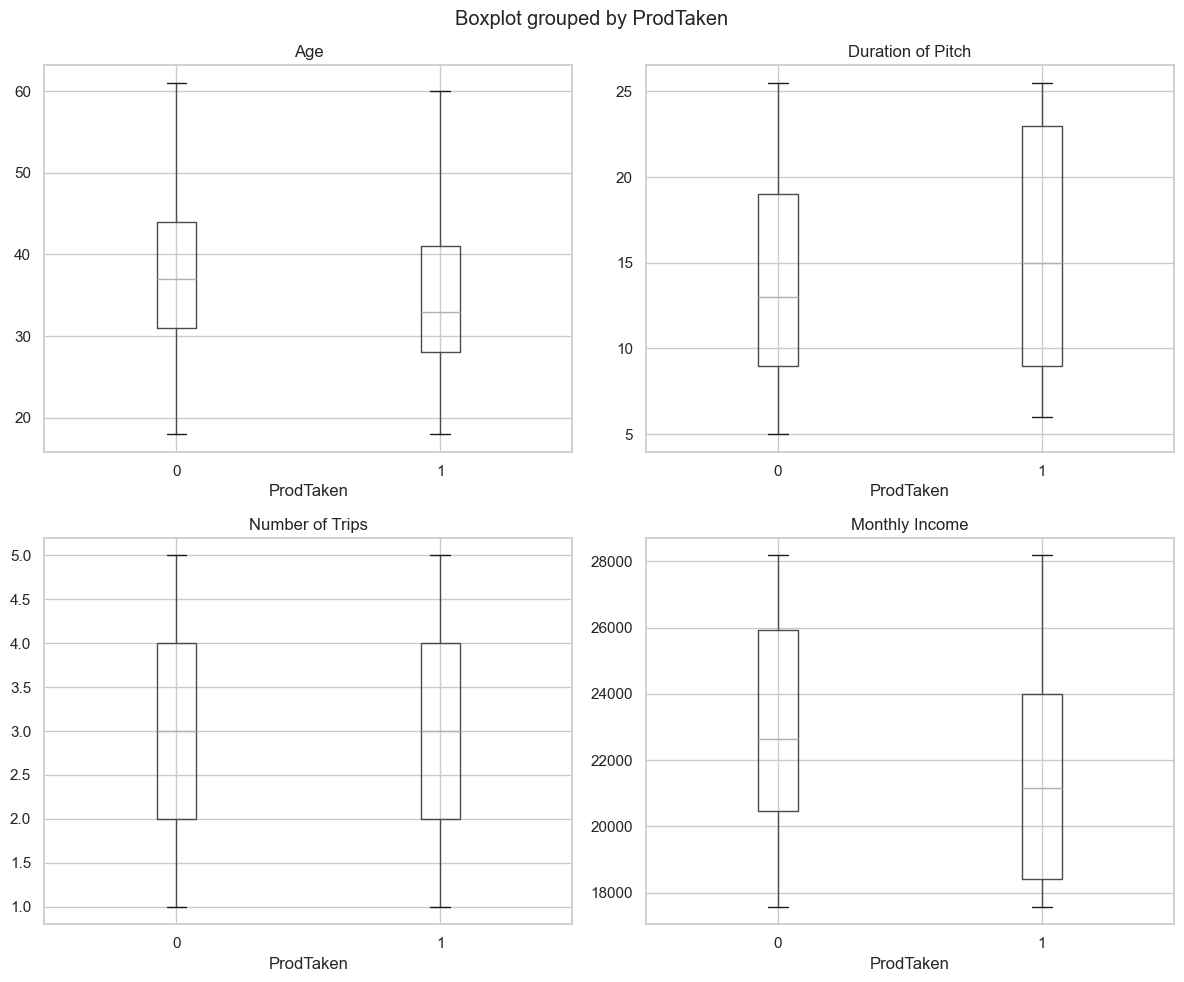

In [82]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot box plots for each column
df.boxplot(column='Age', by='ProdTaken', ax=axes[0, 0])
axes[0, 0].set_title('Age')

df.boxplot(column='DurationOfPitch', by='ProdTaken', ax=axes[0, 1])
axes[0, 1].set_title('Duration of Pitch')

df.boxplot(column='NumberOfTrips', by='ProdTaken', ax=axes[1, 0])
axes[1, 0].set_title('Number of Trips')

df.boxplot(column='MonthlyIncome', by='ProdTaken', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Income')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Insight for Age and ProdTaken:
* Among customers who did not take the product, the middle 50% age range was between 32 and 45 years old.
* In contrast, for customers who took the product, the middle 50% age range was slightly lower, between 28 and 41 years old.
* This suggests that there's a tendency for younger customers to be more inclined towards purchasing the product, while older customers are less likely to do so. Targeting marketing efforts towards younger demographics could potentially improve conversion rates.
### Insights for Duration of Pitch and Product Taken:
* Customers who eventually took the product were typically engaged in longer sales pitches, with a middle 50% duration ranging from 9 to 23 units.
* Conversely, customers who didn't take the product experienced slightly shorter pitches, with a middle 50% duration ranging from 8 to 18 units.
* This suggests that a more detailed and comprehensive sales pitch might be more effective in persuading customers to make a purchase.
* Therefore, from a business perspective, ensuring that sales pitches are sufficiently informative and engaging, while also respecting customers' time, could enhance the likelihood of converting leads into sales.
### Number of Trips:
* The mean number of trips per year for customers who didn't take the product is 3.21, while for those who took the product, it is 3.25.
* Although the difference is slight, it still suggests a potential relationship between 'ProdTaken' and the number of trips, indicating that customers who took the product might be slightly more frequent travelers.
### Monthly Income:
* The mean monthly income for customers who didn't take the product is approximately $22,992, whereas for those who took the product, it is around $21,781.
* This income disparity suggests a potential relationship between 'ProdTaken' and monthly income, indicating that customers with lower incomes might be more inclined to take the product.


# All the categorical variables vs prodtaken

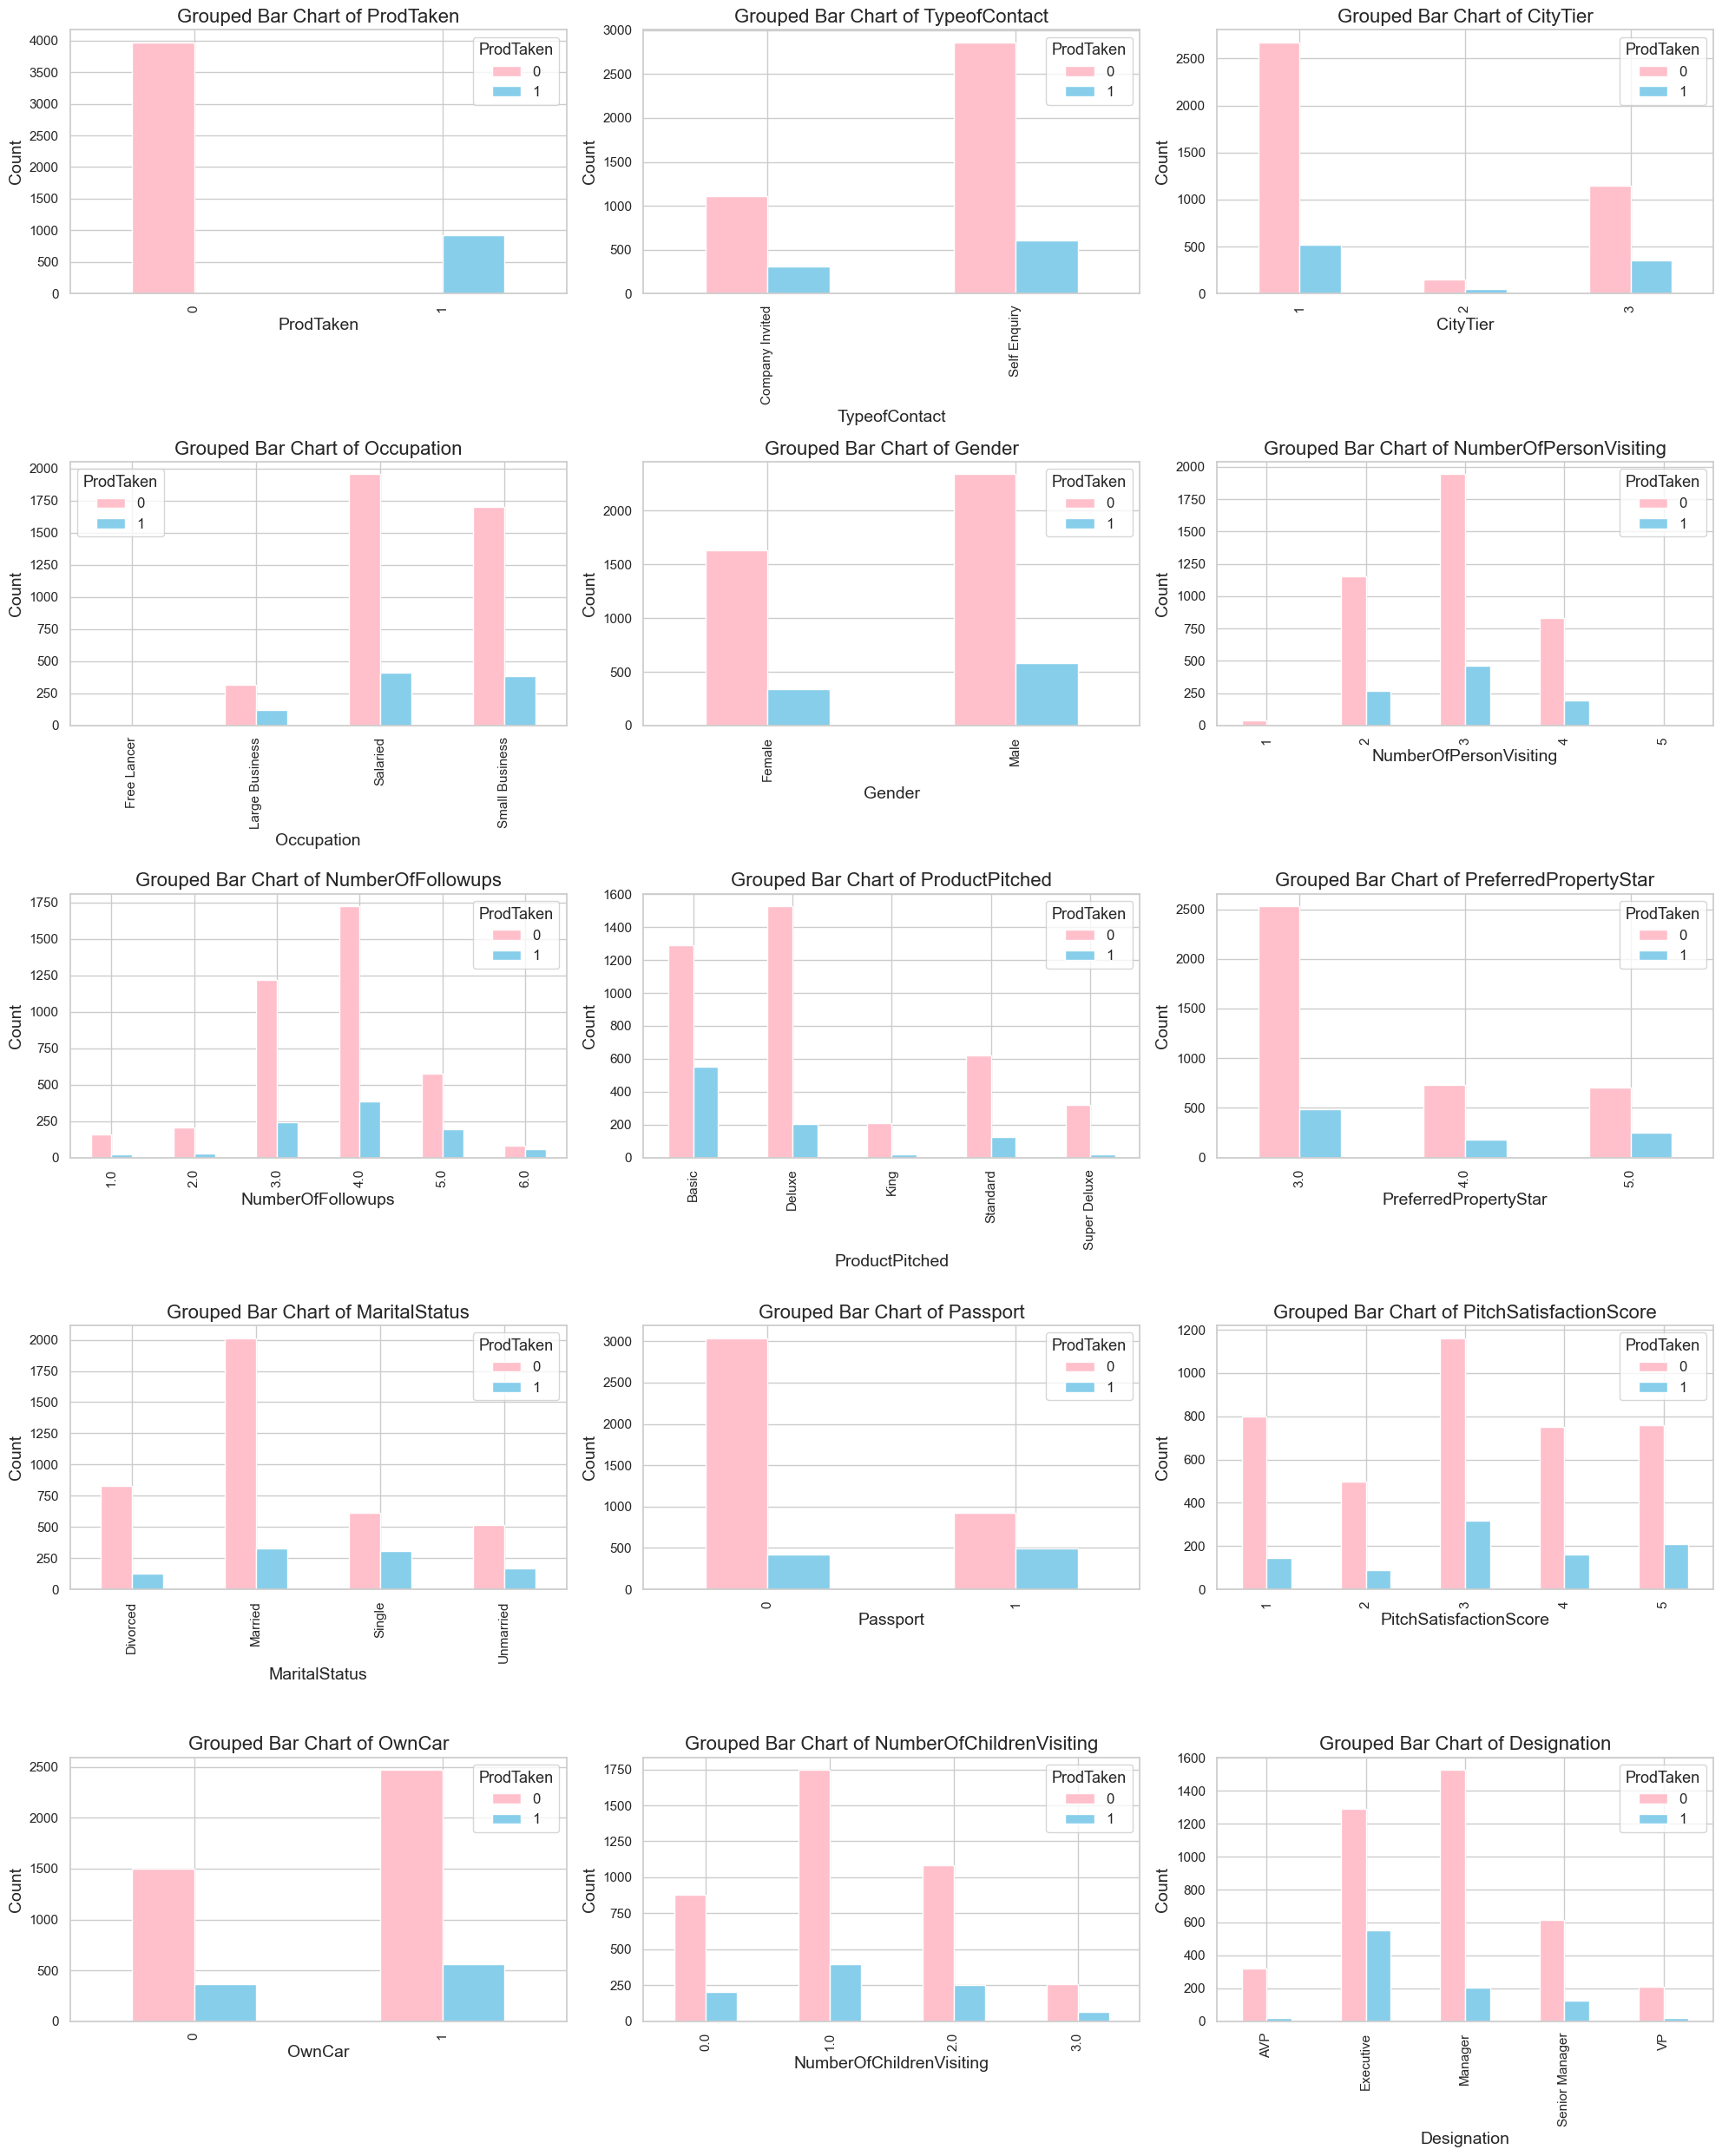

In [83]:
# Select categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include=['object'])

# Calculate the number of rows needed based on the number of categorical columns
num_rows = (len(categorical_columns.columns) + 2) // 3

# Create subplots with the calculated layout
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten the axes array
axes = axes.flatten()

# Plot grouped bar charts for each categorical column
for i, column in enumerate(categorical_columns.columns):
    # Calculate counts for each category by 'ProdTaken'
    counts = df.groupby([column, 'ProdTaken']).size().unstack()

    # Plot grouped bar chart
    counts.plot(kind='bar', ax=axes[i], color=['pink', 'skyblue'], position=0.5)  # Set position to 0.5

    axes[i].set_title(f'Grouped Bar Chart of {column}', fontsize=16)  # Increase title font size
    axes[i].set_xlabel(column, fontsize=14)  # Increase x-axis label font size
    axes[i].set_ylabel('Count', fontsize=14)  # Increase y-axis label font size
    axes[i].legend(title='ProdTaken', title_fontsize='13', fontsize='12')  # Add legend

# Hide empty subplots if there are fewer than 3 categorical columns
if len(categorical_columns.columns) % 3 != 0:
    for i in range(len(categorical_columns.columns) % 3, 3):
        fig.delaxes(axes[-i-1])

plt.tight_layout()
plt.show()


### Multivariant Analysis

# Pair plot Analysis

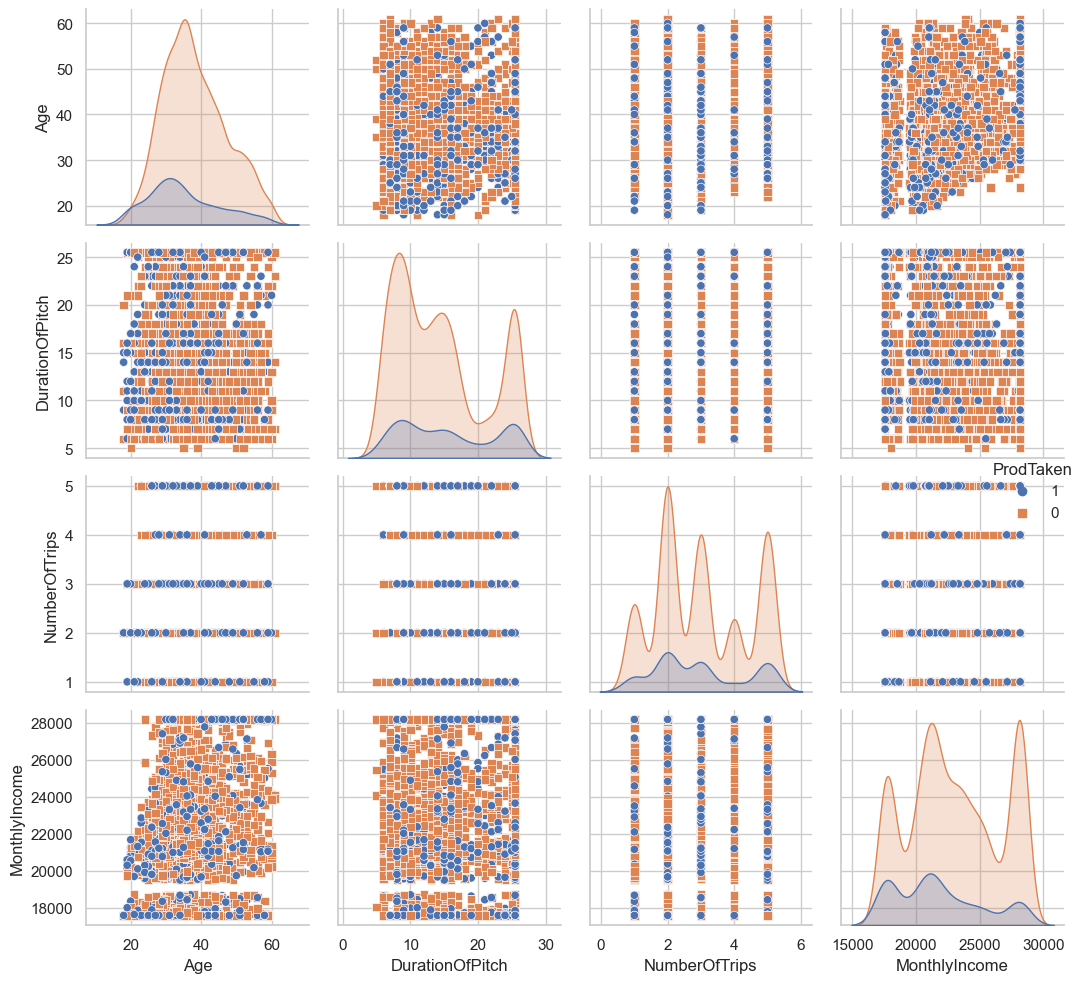

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the input variables
input_variables = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'ProdTaken']

# Check if all input variables are present in the DataFrame
missing_columns = [var for var in input_variables if var not in df.columns]

if missing_columns:
    print("The following columns are missing in the DataFrame:", missing_columns)
else:
    # Select the relevant columns from the dataframe
    selected_data = df[input_variables]

    # Create pair plot
    sns.pairplot(selected_data, hue='ProdTaken', markers=['o', 's'], diag_kind='kde')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


### Age and Product Uptake:
* Younger customers, typically aged between 28 and 41, show a higher likelihood of taking the product compared to older age groups (32 to 45).
* Targeting marketing efforts towards younger demographics could potentially improve conversion rates.
### Sales Pitch Duration and Product Uptake:
* Customers who eventually take the product are engaged in longer sales pitches, suggesting that detailed and comprehensive presentations may be more effective in persuading customers to make a purchase.
### Travel Frequency and Product Uptake:
* While the difference is slight, customers who took the product tend to be slightly more frequent travelers compared to those who didn’t.Tailoring marketing strategies to appeal to frequent travelers could potentially enhance product uptake.
### Monthly Income and Product Uptake:
* Customers with lower incomes are more inclined to take the product compared to those with higher incomes.


* These insights collectively suggest that factors such as age, sales pitch duration, travel frequency, and income level influence customers' decisions regarding product uptake.


# Visualization-Heatmap Analysis

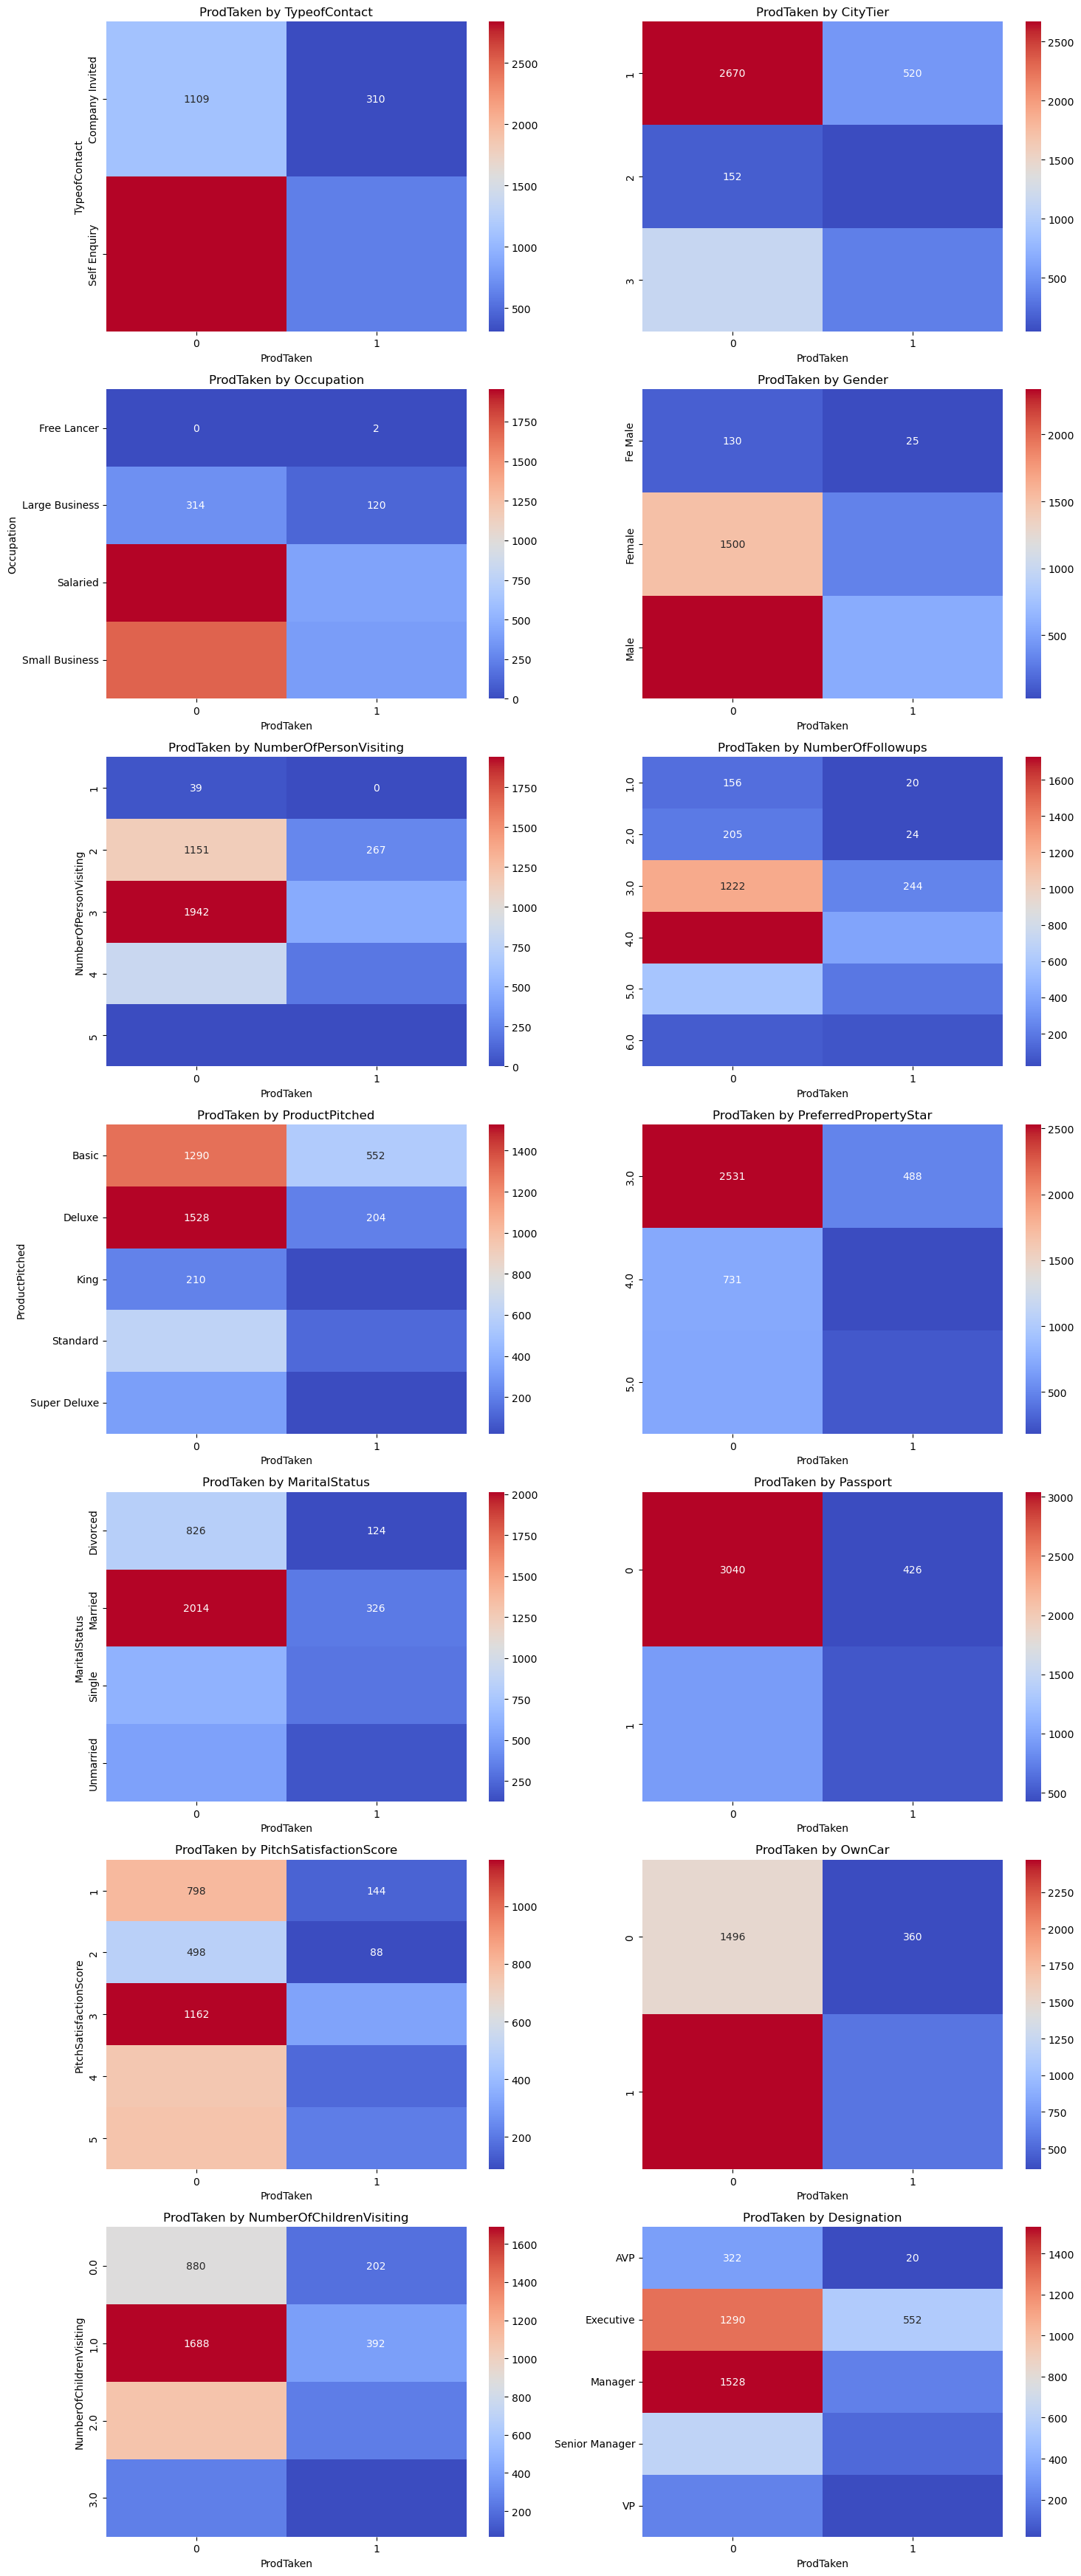

In [25]:
# Define the categorical variables
categorical_variables = ['TypeofContact', 'CityTier', 'Occupation', 'Gender',
                         'NumberOfPersonVisiting', 'NumberOfFollowups',
                         'ProductPitched', 'PreferredPropertyStar',
                         'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
                         'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

# Set the number of columns for the subplots
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(categorical_variables) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the categorical variables and plot heatmaps
for i, var in enumerate(categorical_variables):
    # Create contingency table
    contingency_table = pd.crosstab(index=df[var], columns=df['ProdTaken'])

    # Plot heatmap
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True, ax=axes[i])
    axes[i].set_title(f'ProdTaken by {var}')
    axes[i].set_xlabel('ProdTaken')
    axes[i].set_ylabel(var)

    # Remove y-axis label for the second column of plots
    if i % num_cols == 1:
        axes[i].set_ylabel('')

# Remove any empty subplot
for i in range(len(categorical_variables), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Non Visualization- Crosstab

In [24]:
import pandas as pd

# Selecting only the categorical columns
categorical_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation',
                       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
                       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
                       'Passport', 'PitchSatisfactionScore', 'OwnCar',
                       'NumberOfChildrenVisiting', 'Designation']

# Creating crosstab for each categorical variable
for col in categorical_columns:
    cross_tab = pd.crosstab(index=df[col], columns='count')
    print(f"Crosstab for {col}:\n")
    print(cross_tab)
    print("\n" + "="*50 + "\n")


Crosstab for ProdTaken:

col_0      count
ProdTaken       
0           3968
1            920


Crosstab for TypeofContact:

col_0            count
TypeofContact         
Company Invited   1419
Self Enquiry      3444


Crosstab for CityTier:

col_0     count
CityTier       
1          3190
2           198
3          1500


Crosstab for Occupation:

col_0           count
Occupation           
Free Lancer         2
Large Business    434
Salaried         2368
Small Business   2084


Crosstab for Gender:

col_0    count
Gender        
Fe Male    155
Female    1817
Male      2916


Crosstab for NumberOfPersonVisiting:

col_0                   count
NumberOfPersonVisiting       
1                          39
2                        1418
3                        2402
4                        1026
5                           3


Crosstab for NumberOfFollowups:

col_0              count
NumberOfFollowups       
1.0                  176
2.0                  229
3.0                 1466
4.0      

# **Insights**
* **Type of Contact:** "Company Invited" contacts show higher uptake than "Self Enquiry".
* **City Tier:** Higher-tier cities have higher uptake rates.
* **Occupation:** Occupation impacts uptake, but specifics need further analysis.
* **Gender:** Gender's influence on uptake is unclear.
* **Number of Persons Visiting:** Group size affects uptake patterns.
* **Number of Follow-ups:** More follow-ups correlate with higher uptake.
* **Product Pitched:** Certain products have higher uptake rates.
* **Preferred Property Star:** Property star rating preference influences uptake.
* **Marital Status:** Different statuses correlate with varying uptake rates.
* **Passport:** Passport holders may uptake products more.
* **Pitch Satisfaction Score:** Higher scores correlate with higher uptake.
* **Own Car:** Car ownership's impact on uptake needs further analysis.
* **Number of Children Visiting:** Children presence may influence uptake.
* **Designation:** Designation may influence uptake, but requires more investigation.
* These insights indicating potential relationships with product uptake. These distinct differences suggest that each categorical variable may indeed influence whether a customer takes up the product or not.


# **Recomendations**

#### Targeted Marketing Channels:
* Analyze the effectiveness of different contact channels (e.g., phone, email, social media) and allocate resources to the most successful ones.
* Implement personalized communication strategies based on customer preferences to enhance engagement and conversion rates.
#### City-Specific Strategies:
* Customize marketing campaigns and product offerings to meet the needs and preferences of customers in different city tiers.
* Collaborate with local partners to create location-specific promotions and experiences tailored to residents' preferences.
#### Optimizing Travel Frequency:
* Use data analytics to understand customer travel patterns and preferences.
* Offer loyalty programs and personalized promotions to encourage repeat bookings and increase customer retention.
#### Age-Tailored Products:
* Develop products and services tailored to the needs and preferences of different age groups.
* Offer specialized packages and promotions targeting specific age demographics, such as adventure tours for young adults and luxury cruises for retirees.
#### Marital Status-Based Offers:
* Create tailored travel packages and promotions for different marital statuses, such as honeymoon specials for newlyweds and family-friendly deals for couples with children.
* Use customer data to personalize marketing campaigns and offers based on marital status, ensuring relevance and resonance with target audiences.
####  Enhanced Sales Pitches:
* Train sales representatives to deliver concise and engaging pitches that effectively communicate product benefits.
* Utilize multimedia content and interactive elements to maintain audience interest and improve understanding during sales presentations.
#### Accommodation Options for Group Travel:
* Provide flexible accommodation options suitable for varying group sizes and preferences.
* Offer group discounts and tailored packages to appeal to families, large travel groups, and solo travelers alike.
#### Quality-Driven Branding:
* Focus on delivering high-quality experiences and services to build a strong brand reputation and customer loyalty.
* Emphasize value and satisfaction in marketing messaging to resonate with consumers across different demographics and preferences.



  **Machine Learning Model Documentation**

1. `Input and Output/Target Variables`

 - Input Variables:
      - 'CustomerID;,'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'

- Output/Target Variable:
     - ProdTaken

2. `Type of ML Task :`

 - Here the type of machine learning task is **Classification**. This means the model is designed to predict a categorical outcome.
    - Logistic Regression, Decision Tree, Random Forest, XGBoost, k-Nearest Neighbors (k-NN), Naive Bayes


3. `Evaluation Metric`

 -   For **classification** tasks, the performance of the model is evaluated using classification metrics.

      - Accuracy, Precision, Recall, F1 Score, AUC-ROC, Confusion Matrix, Logarithmic Loss (Log Loss)





### **Step 3 - Segregate Inputs (X) and Output (y)**



In [87]:
X = df.drop(columns=['ProdTaken', 'CustomerID'])
y = df['ProdTaken']
#print(X)
#print(y)

### **Step 4 - Split the data into Train and Test**


In [88]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3666, 18) (3666,)
(1222, 18) (1222,)


### **Step 5 - Apply Data Preparation on Training Data**


In [89]:
X_train.dtypes

Age                         float64
TypeofContact                object
CityTier                     object
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting       object
NumberOfFollowups            object
ProductPitched               object
PreferredPropertyStar        object
MaritalStatus                object
NumberOfTrips               float64
Passport                     object
PitchSatisfactionScore       object
OwnCar                       object
NumberOfChildrenVisiting     object
Designation                  object
MonthlyIncome               float64
dtype: object

In [90]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [91]:
X_train_cat.head()

,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
3129,Company Invited,3,Small Business,Male,3,5.0,Deluxe,5.0,Unmarried,0,3,1,2.0,Manager
1328,Self Enquiry,3,Small Business,Female,2,4.0,Deluxe,3.0,Married,0,1,1,1.0,Manager
3237,Self Enquiry,1,Salaried,Male,3,4.0,Basic,3.0,Married,0,4,1,2.0,Executive
576,Self Enquiry,3,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,0,3,0,1.0,Manager
836,Self Enquiry,3,Salaried,Female,2,4.0,Standard,5.0,Divorced,0,3,0,0.0,Senior Manager


In [92]:
X_train_num.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
3129,27.0,7.0,3.0,22972.0
1328,46.0,25.5,2.0,18540.0
3237,29.0,22.0,3.0,20885.0
576,27.0,25.0,1.0,20485.0
836,29.0,25.5,2.0,22336.0


**Numerical Feature Transformation: Applying Standardization**


In [93]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns = std_scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_num_transformed.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
3129,-1.144598,-1.133627,-0.012769,0.053259
1328,0.899968,1.653025,-0.744177,-1.187553
3237,-0.929380,1.125821,-0.012769,-0.531031
576,-1.144598,1.577710,-1.475584,-0.643018
836,-0.929380,1.653025,-0.744177,-0.124800


In [94]:
# Let's now analyse the properties of 'Standard Scaler'

print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Output Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 4
Output Feature Names: ['Age' 'DurationOfPitch' 'NumberOfTrips' 'MonthlyIncome']
Mean of each column: [3.76366612e+01 1.45259138e+01 3.01745772e+00 2.27817664e+04]
Std of each column: [9.29292407e+00 6.63878933e+00 1.36722635e+00 3.57185484e+03]


In [95]:
# Let's also describe the transformed data statistics

X_train_num_transformed.describe().round(3)

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3666.000,3666.000,3666.000,3666.000
mean,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-2.113,-1.435,-1.476,-1.457
25%,-0.714,-0.832,-0.744,-0.711
50%,-0.176,-0.230,-0.013,-0.147
75%,0.685,0.825,0.719,0.792
max,2.514,1.653,1.450,1.511


**Categorical Feature Transformation: Applying OHE and Ordinal Encoding**

In [96]:
# Select relevant columns and ensure data consistency
X_train_cat_ordinal = X_train_cat[['CityTier', 'Occupation', 'ProductPitched', 'Designation', 'PreferredPropertyStar', 'PitchSatisfactionScore']]

# Convert numeric categories to string for consistency with defined categories
X_train_cat_ordinal['CityTier'] = X_train_cat_ordinal['CityTier'].astype(str)
X_train_cat_ordinal['PreferredPropertyStar'] = X_train_cat_ordinal['PreferredPropertyStar'].astype(str)
X_train_cat_ordinal['PitchSatisfactionScore'] = X_train_cat_ordinal['PitchSatisfactionScore'].astype(str)

# Strip leading/trailing spaces from all values
X_train_cat_ordinal = X_train_cat_ordinal.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Define the ordering for categorical columns (lowest to highest)
CityTier_categories = ['1', '2', '3']
Occupation_categories = ['Free Lancer', 'Salaried', 'Small Business', 'Large Business']
ProductPitched_categories = ['Basic', 'Standard', 'Deluxe', 'King', 'Super Deluxe']
Designation_categories = ['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP']
PreferredProperty_categories = ['3.0', '4.0', '5.0']
PitchSatisfaction_categories = ['1', '2', '3', '4', '5'] 

In [97]:
# Create the OrdinalEncoder with the specified categories
from sklearn.preprocessing import OrdinalEncoder

#ordinal_encoder = OrdinalEncoder(categories=[Occupation_categories,ProductPitched_categories,Designation_categories,PreferredPropertyStar_categories],
                                 #handle_unknown="use_encoded_value",
                                 #unknown_value=-1)
ordinal_encoder = OrdinalEncoder(categories=[CityTier_categories, Occupation_categories, ProductPitched_categories, Designation_categories, PreferredProperty_categories, PitchSatisfaction_categories],
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1,
                                 encoded_missing_value=-5)

# Apply the encoding
X_train_cat_ordinal_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat_ordinal),
                                     columns=ordinal_encoder.get_feature_names_out(),
                                     index = X_train_cat_ordinal.index)

X_train_cat_ordinal_transformed.head()

,CityTier,Occupation,ProductPitched,Designation,PreferredPropertyStar,PitchSatisfactionScore
3129,2.0,2.0,2.0,1.0,2.0,2.0
1328,2.0,2.0,2.0,1.0,0.0,0.0
3237,0.0,1.0,0.0,0.0,0.0,3.0
576,2.0,2.0,2.0,1.0,0.0,2.0
836,2.0,1.0,1.0,2.0,2.0,2.0


In [98]:
print("Shape of Data before Transformation:", X_train_cat_ordinal.shape)
print("Shape of Data after Transformation:", X_train_cat_ordinal_transformed.shape)

Shape of Data before Transformation: (3666, 6)
Shape of Data after Transformation: (3666, 6)


In [99]:
# Let's now analyse the properties of 'ordinal_encoder'

print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print("Unique Categories:", ordinal_encoder.categories_)
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['CityTier' 'Occupation' 'ProductPitched' 'Designation'
 'PreferredPropertyStar' 'PitchSatisfactionScore']
Unique Categories: [array(['1', '2', '3'], dtype=object), array(['Free Lancer', 'Salaried', 'Small Business', 'Large Business'],
      dtype=object), array(['Basic', 'Standard', 'Deluxe', 'King', 'Super Deluxe'],
      dtype=object), array(['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'],
      dtype=object), array(['3.0', '4.0', '5.0'], dtype=object), array(['1', '2', '3', '4', '5'], dtype=object)]
Feature Names after encoding: ['CityTier' 'Occupation' 'ProductPitched' 'Designation'
 'PreferredPropertyStar' 'PitchSatisfactionScore']


In [100]:
# segregating these categorical columns for OHE

X_train_cat_ohe = X_train_cat[['TypeofContact','Gender','MaritalStatus','OwnCar','Passport']]

# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False,
                               handle_unknown="ignore")


X_train_cat_ohe_transformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat_ohe),
                               columns=onehot_encoder.get_feature_names_out(),
                               index = X_train_cat_ohe.index)

print("Shape of Data before Transformation:", X_train_cat_ohe.shape)
print("Shape of Data after Transformation:", X_train_cat_ohe_transformed.shape)

X_train_cat_ohe_transformed.head()

Shape of Data before Transformation: (3666, 5)
Shape of Data after Transformation: (3666, 12)


,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,OwnCar_0,OwnCar_1,Passport_0,Passport_1
3129,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1328,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3237,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
576,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
836,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [101]:
# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['TypeofContact' 'Gender' 'MaritalStatus' 'OwnCar' 'Passport']
Unique Categories: [array(['Company Invited', 'Self Enquiry'], dtype=object), array(['Female', 'Male'], dtype=object), array(['Divorced', 'Married', 'Single', 'Unmarried'], dtype=object), array([0, 1], dtype=object), array([0, 1], dtype=object)]
Feature Names after encoding: ['TypeofContact_Company Invited' 'TypeofContact_Self Enquiry'
 'Gender_Female' 'Gender_Male' 'MaritalStatus_Divorced'
 'MaritalStatus_Married' 'MaritalStatus_Single' 'MaritalStatus_Unmarried'
 'OwnCar_0' 'OwnCar_1' 'Passport_0' 'Passport_1']


In [102]:
# concatinating all segregated columns to categorical columns

X_train_cat_transformed = pd.concat([X_train_cat_ordinal_transformed,X_train_cat_ohe_transformed], axis=1)

X_train_cat_transformed

,CityTier,Occupation,ProductPitched,Designation,PreferredPropertyStar,PitchSatisfactionScore,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,OwnCar_0,OwnCar_1,Passport_0,Passport_1
3129,2.0,2.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1328,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3237,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
576,2.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
836,2.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3264,2.0,2.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2607,0.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [103]:
# Concatenate X_train_num_transformed and X_train_cat_transformed

X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis = 1)
X_train_transformed.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,CityTier,Occupation,ProductPitched,Designation,PreferredPropertyStar,PitchSatisfactionScore,...,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,OwnCar_0,OwnCar_1,Passport_0,Passport_1
3129,-1.144598,-1.133627,-0.012769,0.053259,2.0,2.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1328,0.899968,1.653025,-0.744177,-1.187553,2.0,2.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3237,-0.929380,1.125821,-0.012769,-0.531031,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
576,-1.144598,1.577710,-1.475584,-0.643018,2.0,2.0,2.0,1.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
836,-0.929380,1.653025,-0.744177,-0.124800,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### **Step 7 - Apply Data Preparation on Test Data**


In [104]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [105]:
X_test_num 

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
751,50.0,6.0,1.0,21347.000
3314,36.0,24.0,5.0,27644.000
1220,36.0,15.0,4.0,19502.000
1362,45.0,6.0,5.0,20399.000
3289,41.0,25.5,5.0,23100.000
...,...,...,...,...
2526,56.0,7.0,5.0,28177.625
2612,39.0,7.0,5.0,27364.000
1021,25.0,6.0,4.0,18420.000
3429,32.0,25.5,3.0,24857.000


In [106]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num),
                                   columns = std_scaler.get_feature_names_out(),
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
751,1.330404,-1.284257,-1.475584,-0.401687
3314,-0.176119,1.427080,1.450047,1.361263
1220,-0.176119,0.071412,0.718639,-0.918225
1362,0.792360,-1.284257,1.450047,-0.667095
3289,0.361925,1.653025,1.450047,0.089095


In [107]:
X_test_num_transformed.describe().round(2)

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,1222.00,1222.00,1222.00,1222.00
mean,-0.02,0.04,-0.02,-0.02
std,1.00,1.01,0.98,1.00
min,-2.11,-1.43,-1.48,-1.46
25%,-0.71,-0.83,-0.74,-0.74
50%,-0.18,-0.08,-0.01,-0.18
75%,0.58,0.98,0.72,0.73
max,2.51,1.65,1.45,1.51


In [108]:
X_test_cat_ordinal = X_test_cat[['CityTier', 'Occupation', 'ProductPitched', 'Designation', 'PreferredPropertyStar', 'PitchSatisfactionScore']]

# Convert numeric categories to string for consistency with defined categories
X_test_cat_ordinal['CityTier'] = X_test_cat_ordinal['CityTier'].astype(str)
X_test_cat_ordinal['PreferredPropertyStar'] = X_test_cat_ordinal['PreferredPropertyStar'].astype(str)
X_test_cat_ordinal['PitchSatisfactionScore'] = X_test_cat_ordinal['PitchSatisfactionScore'].astype(str)

# Strip leading/trailing spaces from all values
X_test_cat_ordinal = X_test_cat_ordinal.applymap(lambda x: x.strip() if isinstance(x, str) else x) 

In [109]:
# Apply transformation on Categorical data using ordinal encoder

X_test_cat_ordinal_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat_ordinal),
                                   columns = ordinal_encoder.get_feature_names_out(),
                                   index = X_test_cat_ordinal.index)

X_test_cat_ordinal_transformed.head()

,CityTier,Occupation,ProductPitched,Designation,PreferredPropertyStar,PitchSatisfactionScore
751,2.0,1.0,2.0,1.0,0.0,1.0
3314,2.0,1.0,2.0,1.0,2.0,2.0
1220,2.0,1.0,2.0,1.0,0.0,3.0
1362,0.0,2.0,2.0,1.0,0.0,0.0
3289,0.0,2.0,2.0,1.0,0.0,1.0


In [110]:
print("Shape of Data before Transformation:", X_test_cat_ordinal.shape)
print("Shape of Data after Transformation:", X_test_cat_ordinal_transformed.shape)

Shape of Data before Transformation: (1222, 6)
Shape of Data after Transformation: (1222, 6)


In [111]:
# Apply transformation on Categorical data using onehot encoder
X_test_cat_ohe = X_test_cat[['TypeofContact','Gender','MaritalStatus','OwnCar','Passport']]
X_test_cat_ohe_transformed = pd.DataFrame(onehot_encoder.transform(X_test_cat_ohe),
                                   columns = onehot_encoder.get_feature_names_out(),
                                   index = X_test_cat_ohe.index)

X_test_cat_ohe_transformed.head()

,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,OwnCar_0,OwnCar_1,Passport_0,Passport_1
751,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3314,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1220,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1362,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3289,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [112]:
print("Shape of Data before Transformation:", X_test_cat_ohe.shape)
print("Shape of Data after Transformation:", X_test_cat_ohe_transformed.shape)

Shape of Data before Transformation: (1222, 5)
Shape of Data after Transformation: (1222, 12)


In [113]:
# concatinating all segregated categorical test columns

X_test_cat_transformed = pd.concat([X_test_cat_ordinal_transformed,X_test_cat_ohe_transformed], axis=1)

X_test_cat_transformed.head()

,CityTier,Occupation,ProductPitched,Designation,PreferredPropertyStar,PitchSatisfactionScore,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,OwnCar_0,OwnCar_1,Passport_0,Passport_1
751,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3314,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1220,2.0,1.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1362,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3289,0.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [114]:
print(X_test_cat_transformed.shape)
print(X_train_cat_transformed.shape)

(1222, 18)
(3666, 18)


In [115]:
print(X_test_num_transformed.shape)
print(X_train_num_transformed.shape)

(1222, 4)
(3666, 4)


In [116]:
# Concatenate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis = 1)
X_test_transformed.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,CityTier,Occupation,ProductPitched,Designation,PreferredPropertyStar,PitchSatisfactionScore,...,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,OwnCar_0,OwnCar_1,Passport_0,Passport_1
751,1.330404,-1.284257,-1.475584,-0.401687,2.0,1.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3314,-0.176119,1.427080,1.450047,1.361263,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1220,-0.176119,0.071412,0.718639,-0.918225,2.0,1.0,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1362,0.792360,-1.284257,1.450047,-0.667095,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3289,0.361925,1.653025,1.450047,0.089095,0.0,2.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [117]:
print(X_train_transformed.shape,X_test_transformed.shape)

(3666, 22) (1222, 22)


In [118]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## **Step 6, 8 and 9 - Training and Testing Phase**


In [120]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_logistic_regression = metrics.accuracy_score(y_test, y_test_predict)

print("Model's Score :", accuracy_logistic_regression)
print()

Model's Score : 0.8297872340425532

CPU times: total: 109 ms
Wall time: 191 ms


In [121]:
%%time

from sklearn.svm import SVC
from sklearn import metrics


classifier = SVC()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_svc = metrics.accuracy_score(y_test, y_test_predict)

print("Model's Score :", accuracy_svc)
print()

Model's Score : 0.8469721767594108

CPU times: total: 250 ms
Wall time: 383 ms


In [122]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_decision_tree = metrics.accuracy_score(y_test, y_test_predict)

print("Model's Score :", accuracy_decision_tree)
print()

Model's Score : 0.8887070376432079

CPU times: total: 15.6 ms
Wall time: 153 ms


In [123]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_KNN = metrics.accuracy_score(y_test, y_test_predict)

print("KNN Accuracy:", accuracy_KNN)
print()

KNN Accuracy: 0.8903436988543372

CPU times: total: 1.2 s
Wall time: 211 ms


In [124]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_RandomForest = metrics.accuracy_score(y_test, y_test_predict)

print("RandomForestClassifier Accuracy:", accuracy_RandomForest)
print()


RandomForestClassifier Accuracy: 0.9198036006546645

CPU times: total: 234 ms
Wall time: 507 ms


In [125]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_AdaBoost = metrics.accuracy_score(y_test, y_test_predict)

print("AdaBoostClassifier Accuracy:", accuracy_AdaBoost)
print()


AdaBoostClassifier Accuracy: 0.8330605564648118

CPU times: total: 93.8 ms
Wall time: 188 ms


In [126]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_GradientBoosting = metrics.accuracy_score(y_test, y_test_predict)

print("GradientBoostingClassifier Accuracy:", accuracy_GradientBoosting)
print()


GradientBoostingClassifier Accuracy: 0.855973813420622

CPU times: total: 344 ms
Wall time: 419 ms


In [127]:
%%time

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

classifier = GaussianNB()
classifier.fit(X_train_transformed, y_train)

y_test_predict = classifier.predict(X_test_transformed)
accuracy_NaiveBayes = metrics.accuracy_score(y_test, y_test_predict)

print("GaussianNB Accuracy:", accuracy_NaiveBayes)
print()


GaussianNB Accuracy: 0.8044189852700491

CPU times: total: 0 ns
Wall time: 17.2 ms


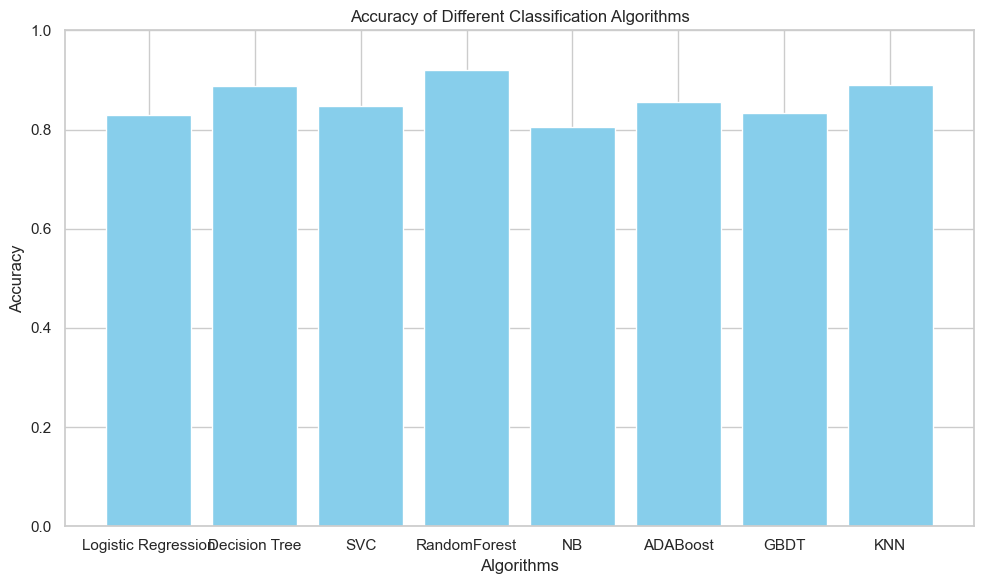

In [128]:
# List of algorithms and their accuracies
algorithms = ['Logistic Regression', 'Decision Tree', 'SVC','RandomForest','NB','ADABoost','GBDT','KNN']
accuracies = [accuracy_logistic_regression, accuracy_decision_tree, accuracy_svc,  accuracy_RandomForest,accuracy_NaiveBayes,accuracy_GradientBoosting,accuracy_AdaBoost, accuracy_KNN]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Algorithms')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Logistic Regression Time Taken: 0.02460479736328125 seconds
Decision Tree Time Taken: 0.024828195571899414 seconds
SVC Time Taken: 0.41608285903930664 seconds
RandomForest Time Taken: 0.33799219131469727 seconds
NB Time Taken: 0.0 seconds
ADABoost Time Taken: 0.13866066932678223 seconds
GBDT Time Taken: 0.4193897247314453 seconds
KNN Time Taken: 0.12171697616577148 seconds


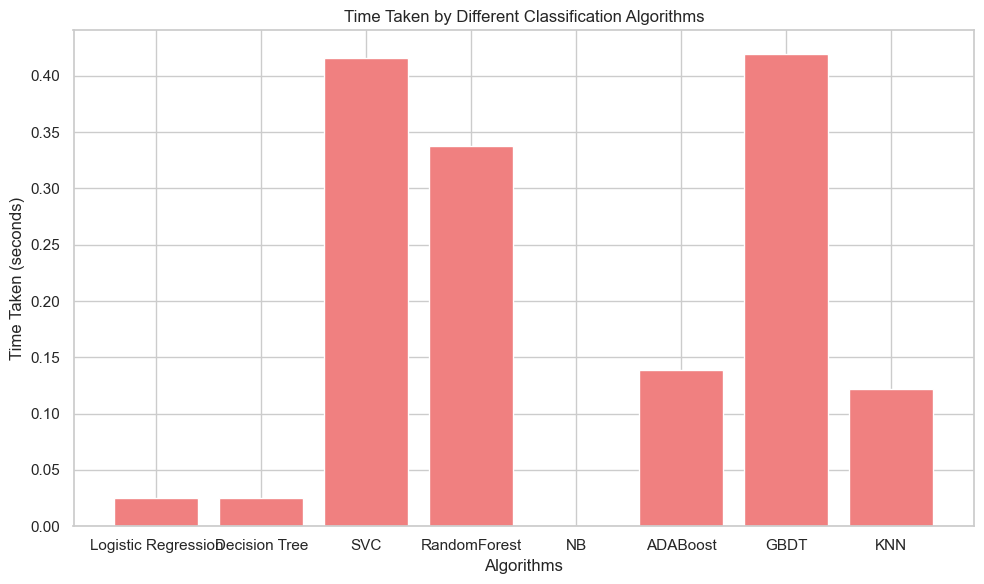

In [133]:
import time

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'NB': GaussianNB(),
    'ADABoost': AdaBoostClassifier(),
    'GBDT': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Initialize a dictionary to store times
times = {}

# Loop through the classifiers and measure the time taken
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_transformed, y_train)
    y_test_predict = clf.predict(X_test_transformed)
    elapsed_time = time.time() - start_time
    
    times[name] = elapsed_time
    
    print(f"{name} Time Taken: {elapsed_time} seconds")

# Plot the time taken by each classifier
import matplotlib.pyplot as plt

# Extract algorithm names and times
algorithm_names = list(times.keys())
times_taken = list(times.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, times_taken, color='lightcoral')
plt.xlabel('Algorithms')
plt.ylabel('Time Taken (seconds)') 
plt.title('Time Taken by Different Classification Algorithms')
plt.tight_layout()
plt.show() 